# 3

 Teoría Detallada del Modelo Funcional Lineal y Estimación del Kernel ψ(t,s)

 **1. Marco Teórico**

 **1.1 Modelo Funcional Lineal**
Se considera el modelo de regresión funcional:
$$
Y_i(t) = \alpha(t) + \int \psi(t, s) X_i(s) \, ds + \varepsilon_i(t), \quad i=1,\dots,N,
$$
donde:
- $X_i(s)$ y $Y_i(t)$ son procesos estocásticos en $L^2([0,1])$.
- $\alpha(t)$ es el intercepto funcional.
- $\psi(t,s)$ es el **kernel de regresión** que captura la relación funcional entre $X$ e $Y$.
- $\varepsilon_i(t)$ es el error funcional, independiente de $X_i$, con media cero.

 **1.2 Centrado del Modelo**
Al tomar esperanzas en ambos lados, se obtiene:
$$
\mu_Y(t) = \alpha(t) + \int \psi(t,s) \mu_X(s) \, ds,
$$
lo que permite reescribir el modelo en términos centrados:
$$
Y_i^c(t) = \int \psi(t,s) X_i^c(s) \, ds + \varepsilon_i(t),
$$
donde $Y_i^c = Y_i - \mu_Y$ y $X_i^c = X_i - \mu_X$. El intercepto se estima como:
$$
\hat{\alpha}(t) = \hat{\mu}_Y(t) - \int \hat{\psi}(t,s) \hat{\mu}_X(s) \, ds.
$$

---

 **2. Expansión en Componentes Principales Funcionales (FPC)**

 **2.1 Descomposición de Karhunen-Loève**
Las funciones $X$ e $Y$ se expanden en bases ortonormales de FPC:
$$
X(s) = \sum_{\ell=1}^\infty \xi_\ell v_\ell(s), \quad Y(t) = \sum_{k=1}^\infty \zeta_k u_k(t),
$$
donde:
- $v_\ell(s)$ y $u_k(t)$ son las funciones propias (FPC) de $X$ e $Y$.
- $\xi_\ell = \langle X, v_\ell \rangle$ y $\zeta_k = \langle Y, u_k \rangle$ son los **scores** (variables aleatorias no correlacionadas).

 **2.2 Expansión del Kernel ψ(t,s)**
El kernel $\psi(t,s)$ admite una representación en la base producto de las FPC:
$$
\psi(t,s) = \sum_{k=1}^\infty \sum_{\ell=1}^\infty \frac{E[\xi_\ell \zeta_k]}{E[\xi_\ell^2]} u_k(t) v_\ell(s).
$$
- **Interpretación**: Cada término $\frac{\sigma_{\ell k}}{\lambda_\ell}$ cuantifica cómo la variabilidad de $X$ en la dirección $v_\ell(s)$ influye en $Y$ en la dirección $u_k(t)$, normalizada por la varianza $\lambda_\ell = E[\xi_\ell^2]$.

 **2.3 Estimación de Parámetros**
- **Varianzas ($\lambda_\ell$)**: Estimadas como los valores propios del operador de covarianza de $X$.
- **Covarianzas ($\sigma_{\ell k}$)**: 
  $$
  \hat{\sigma}_{\ell k} = \frac{1}{N} \sum_{i=1}^N \langle X_i^c, \hat{v}_\ell \rangle \langle Y_i^c, \hat{u}_k \rangle.
  $$
- **Estimador Final**:
  $$
  \hat{\psi}(t,s) = \sum_{k=1}^q \sum_{\ell=1}^p \frac{\hat{\sigma}_{\ell k}}{\hat{\lambda}_\ell} \hat{u}_k(t) \hat{v}_\ell(s),
  $$
  donde $p$ y $q$ son niveles de truncamiento seleccionados por criterios de varianza explicada (ej: 95%).

---

**Implementación**

$$ Y_i = \text{Precipitación}$$
$$ X_i = \text{Temperatura}$$ 

nota: Se supone gran densidad de datos en los dominios

Cargando paquete requerido: splines

Cargando paquete requerido: fds

Cargando paquete requerido: rainbow

Cargando paquete requerido: MASS

Cargando paquete requerido: pcaPP

Cargando paquete requerido: RCurl

Cargando paquete requerido: deSolve


Adjuntando el paquete: 'fda'


The following object is masked from 'package:graphics':

    matplot




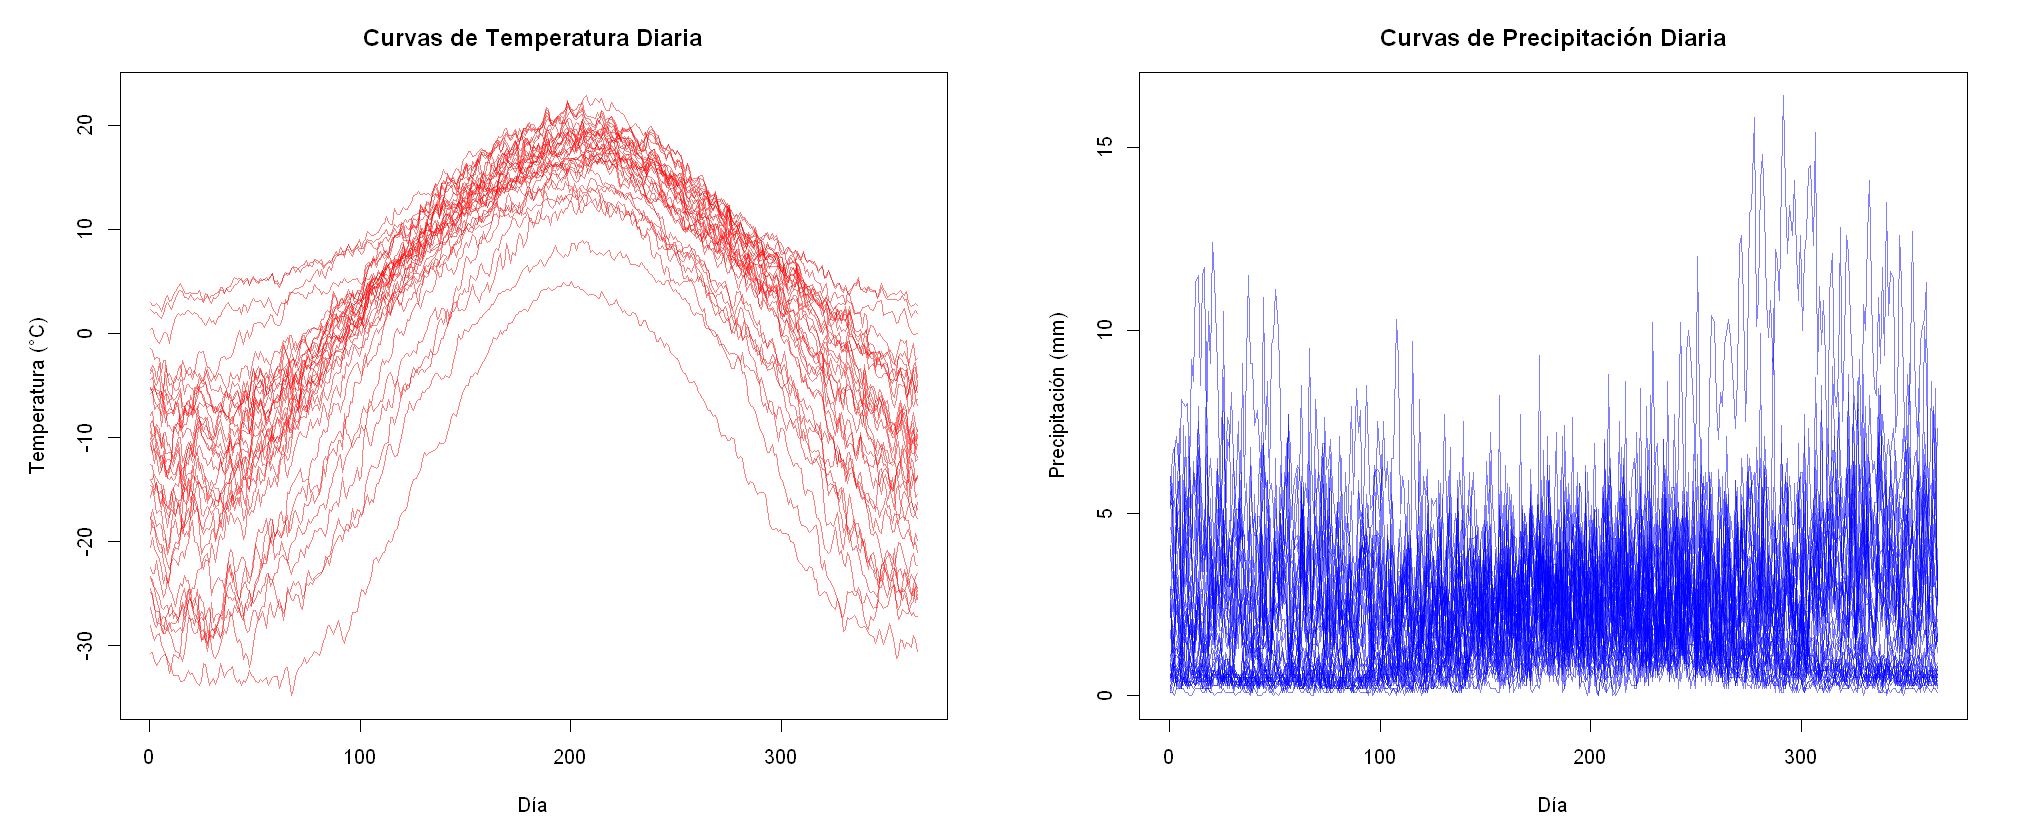

In [1]:
library(fda)
data(daily)
options(repr.plot.width=17, repr.plot.height=7)

# Extraer datos de precipitación y temperatura
precav <- daily$precav
tempav <- daily$tempav
daytime <- (1:365) - 0.5
dayrange <- c(0, 365)
dayperiod <- 365

# Configurar fondo blanco
par(bg = "white", mar=c(5,5,3,3), mfrow=c(1,2))

# Graficar datos de temperatura y precipitación
matplot(daytime, tempav, type = "l", lty = 1, col = rgb(1, 0, 0, 0.5), xlab = "Día", ylab = "Temperatura (°C)", main = "Curvas de Temperatura Diaria")
matplot(daytime, precav, type = "l", lty = 1, col = rgb(0, 0, 1, 0.5), xlab = "Día", ylab = "Precipitación (mm)", main = "Curvas de Precipitación Diaria")



### Suavizado de curvas mediante bases de Fourier

[1] "done"

[1] "done"

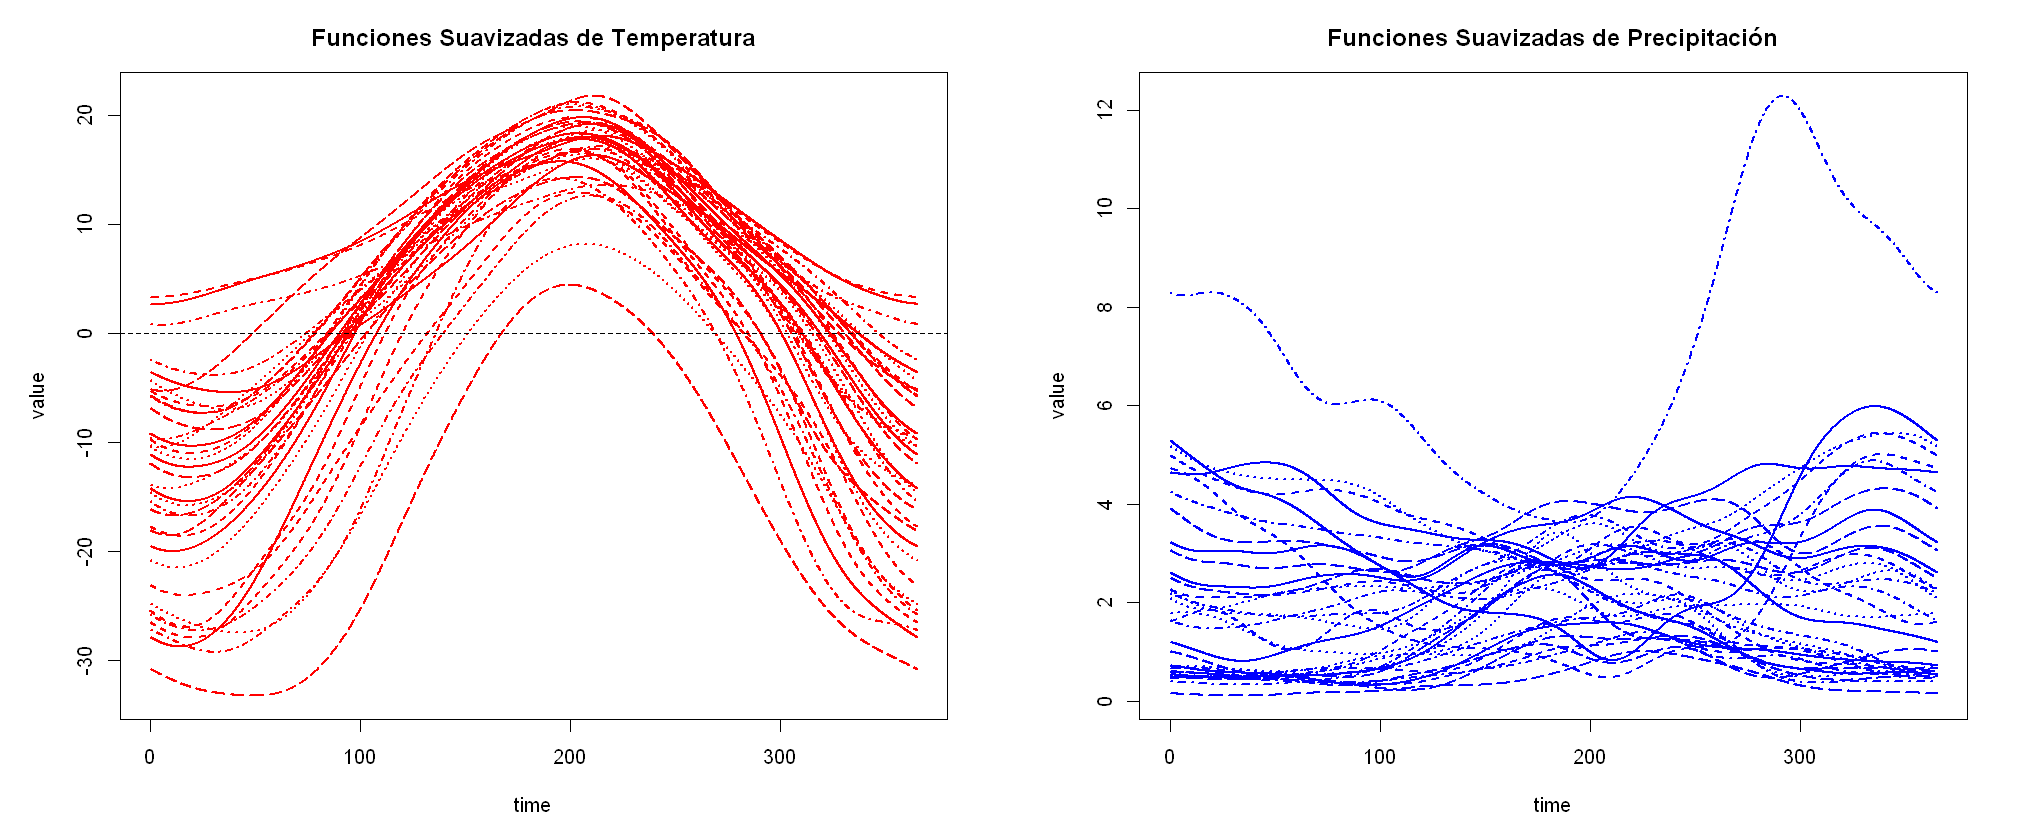

In [2]:
# Crear una base de Fourier para la expansión
daybasis <- create.fourier.basis(dayrange, 365)

# Definir operador de aceleración armónica
Lcoef <- c(0, (2 * pi / dayperiod)^2, 0)
harmaccelLfd <- vec2Lfd(Lcoef, dayrange)

# Realizar el suavizado con penalización por aceleración armónica
lambda <- 1e6
fdParobj <- fdPar(daybasis, harmaccelLfd, lambda)

# Suavizado de precipitación y temperatura
precfd <- smooth.basis(daytime, precav, fdParobj)$fd
tempfd <- smooth.basis(daytime, tempav, fdParobj)$fd

# Configurar fondo blanco y tamaño
par(bg = "white", mar=c(5,5,3,3), mfrow=c(1,2))

# Graficar funciones suavizadas
plot(tempfd, main="Funciones Suavizadas de Temperatura", col="red", lwd=2)
plot(precfd, main="Funciones Suavizadas de Precipitación", col="blue", lwd=2)



### Centrado de las funciones suavizadas y cálculo de FPC

Cargando paquete requerido: spam

Spam version 2.11-1 (2025-01-20) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


Adjuntando el paquete: 'spam'


The following objects are masked from 'package:base':

    backsolve, forwardsolve


Cargando paquete requerido: viridisLite


Try help(fields) to get started.





Table: Varianza Explicada por Componentes Principales

| Componente| Temperatura (%)| Precipitación (%)|
|----------:|---------------:|-----------------:|
|          1|           88.94|             88.43|
|          2|            8.48|              7.80|
|          3|            1.86|              2.49|
|          4|            0.50|              0.54|
|          5|            0.09|              0.29|

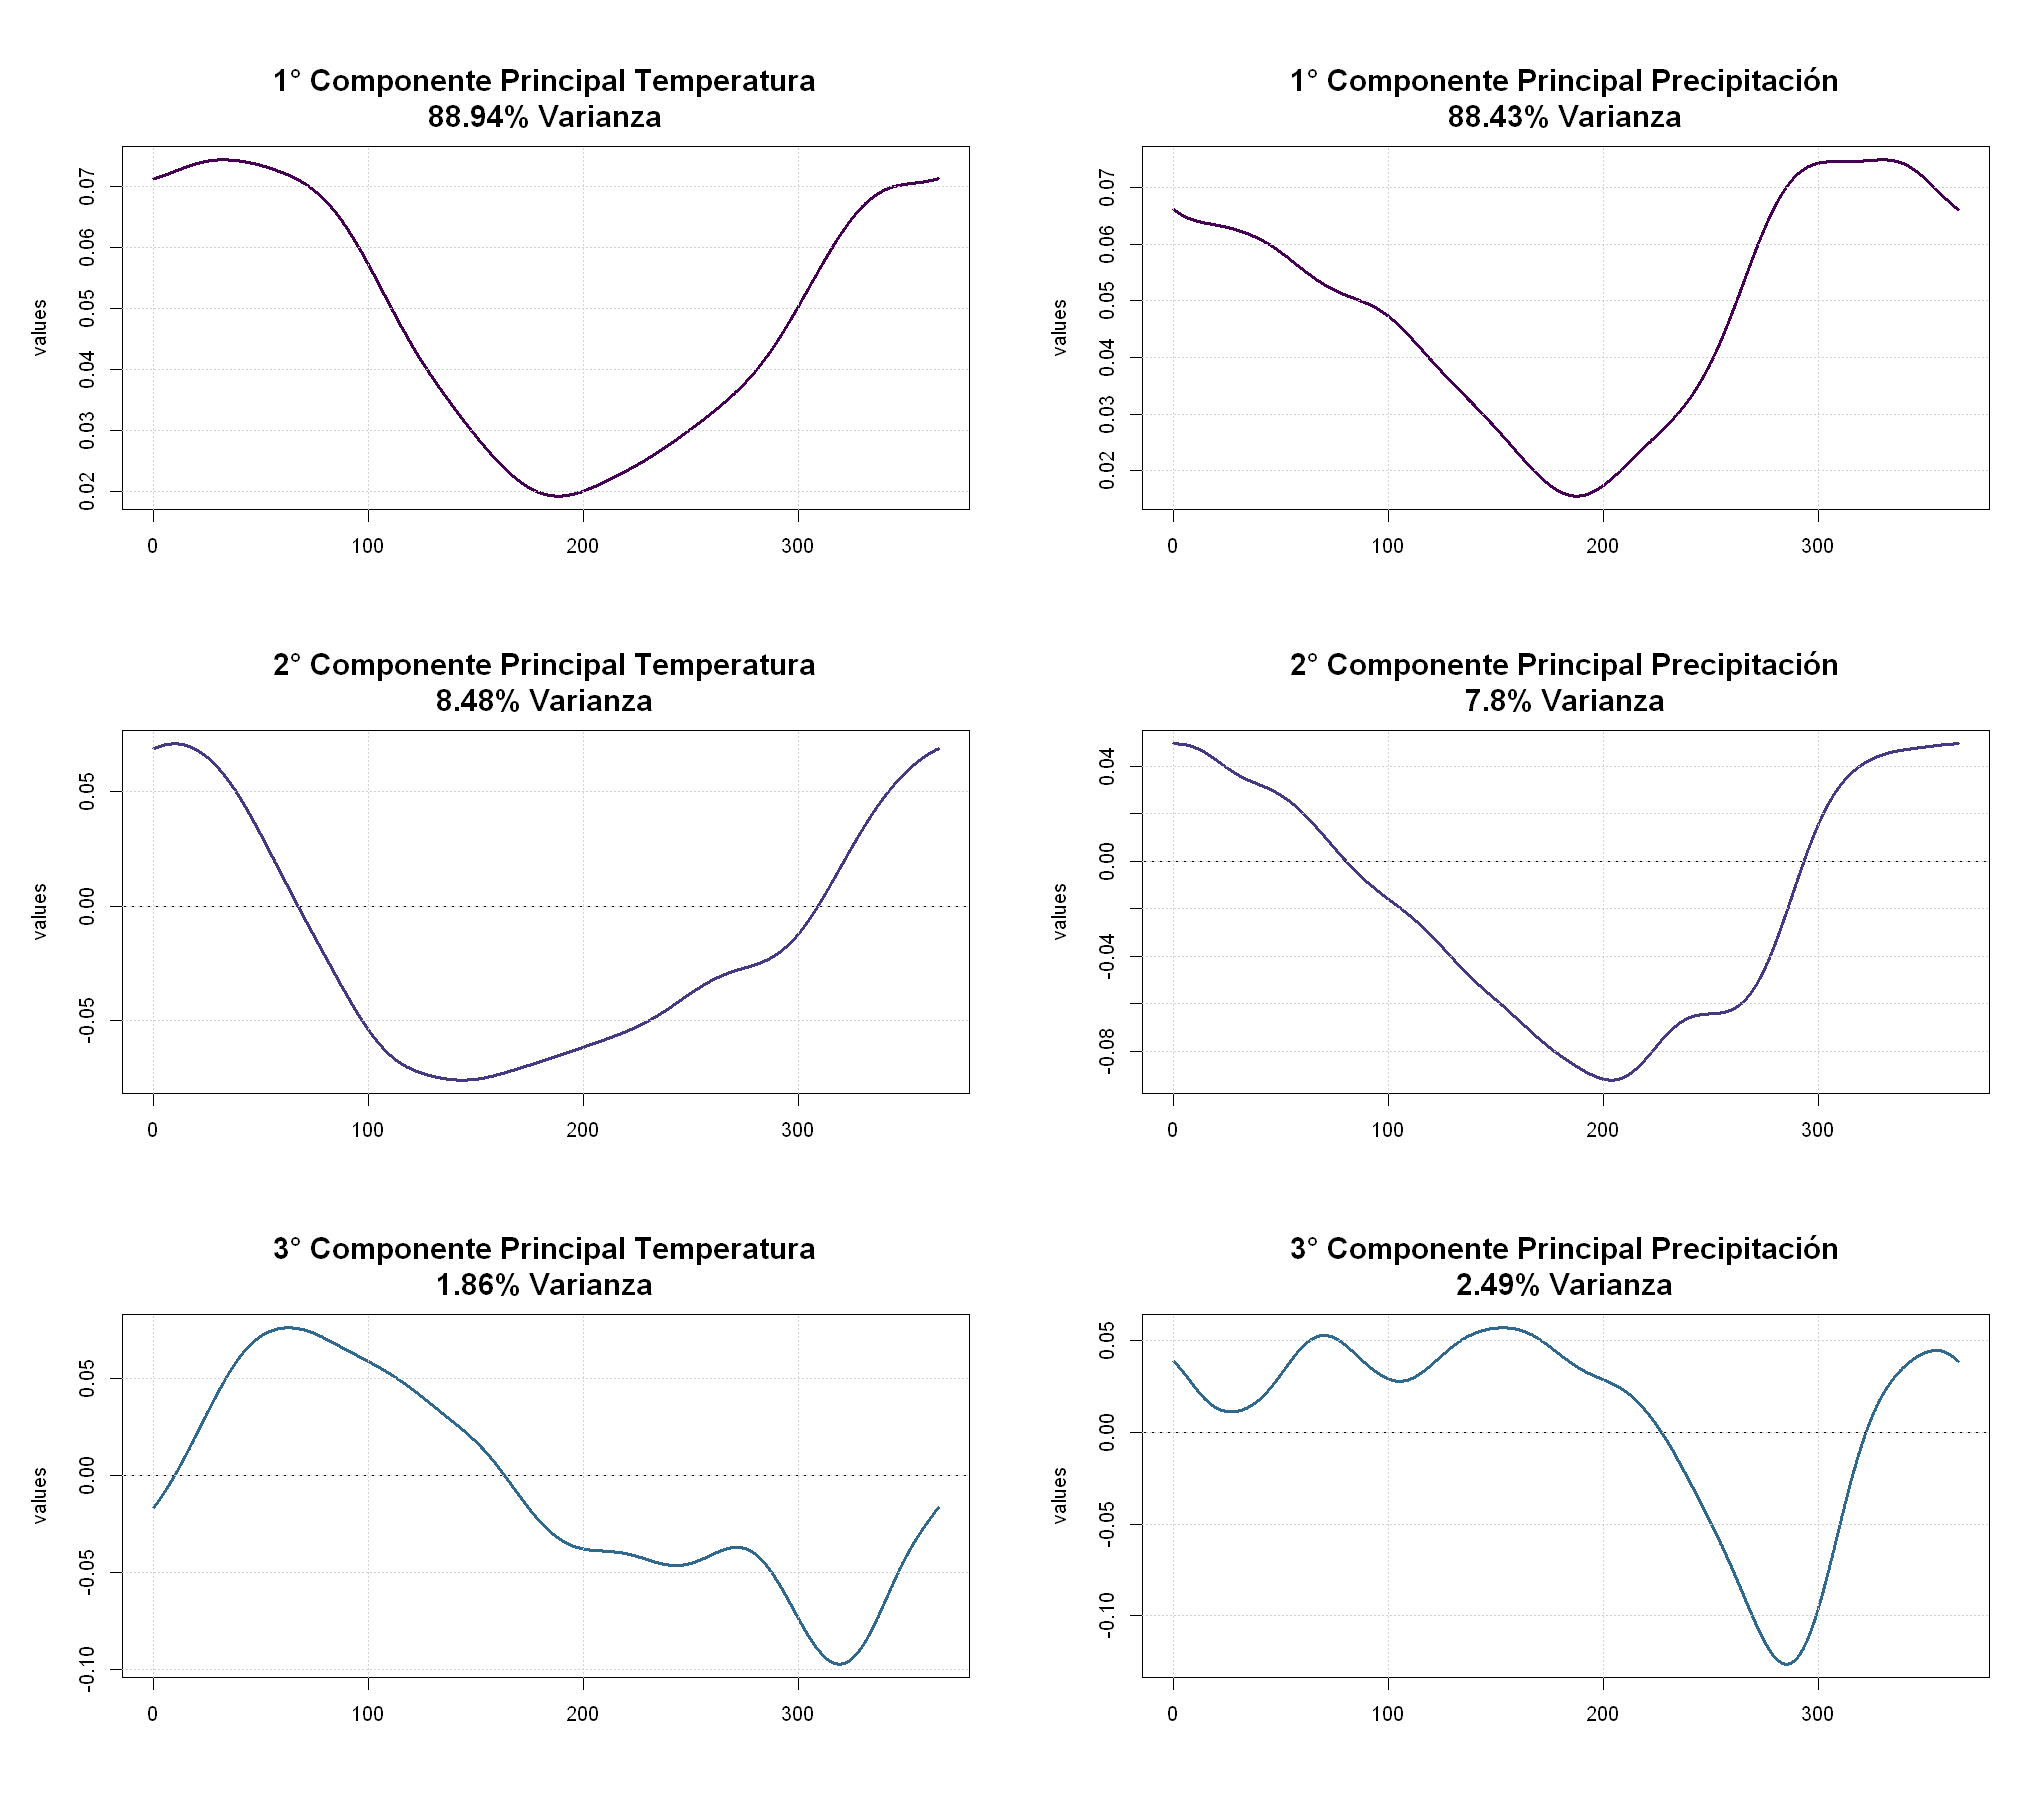

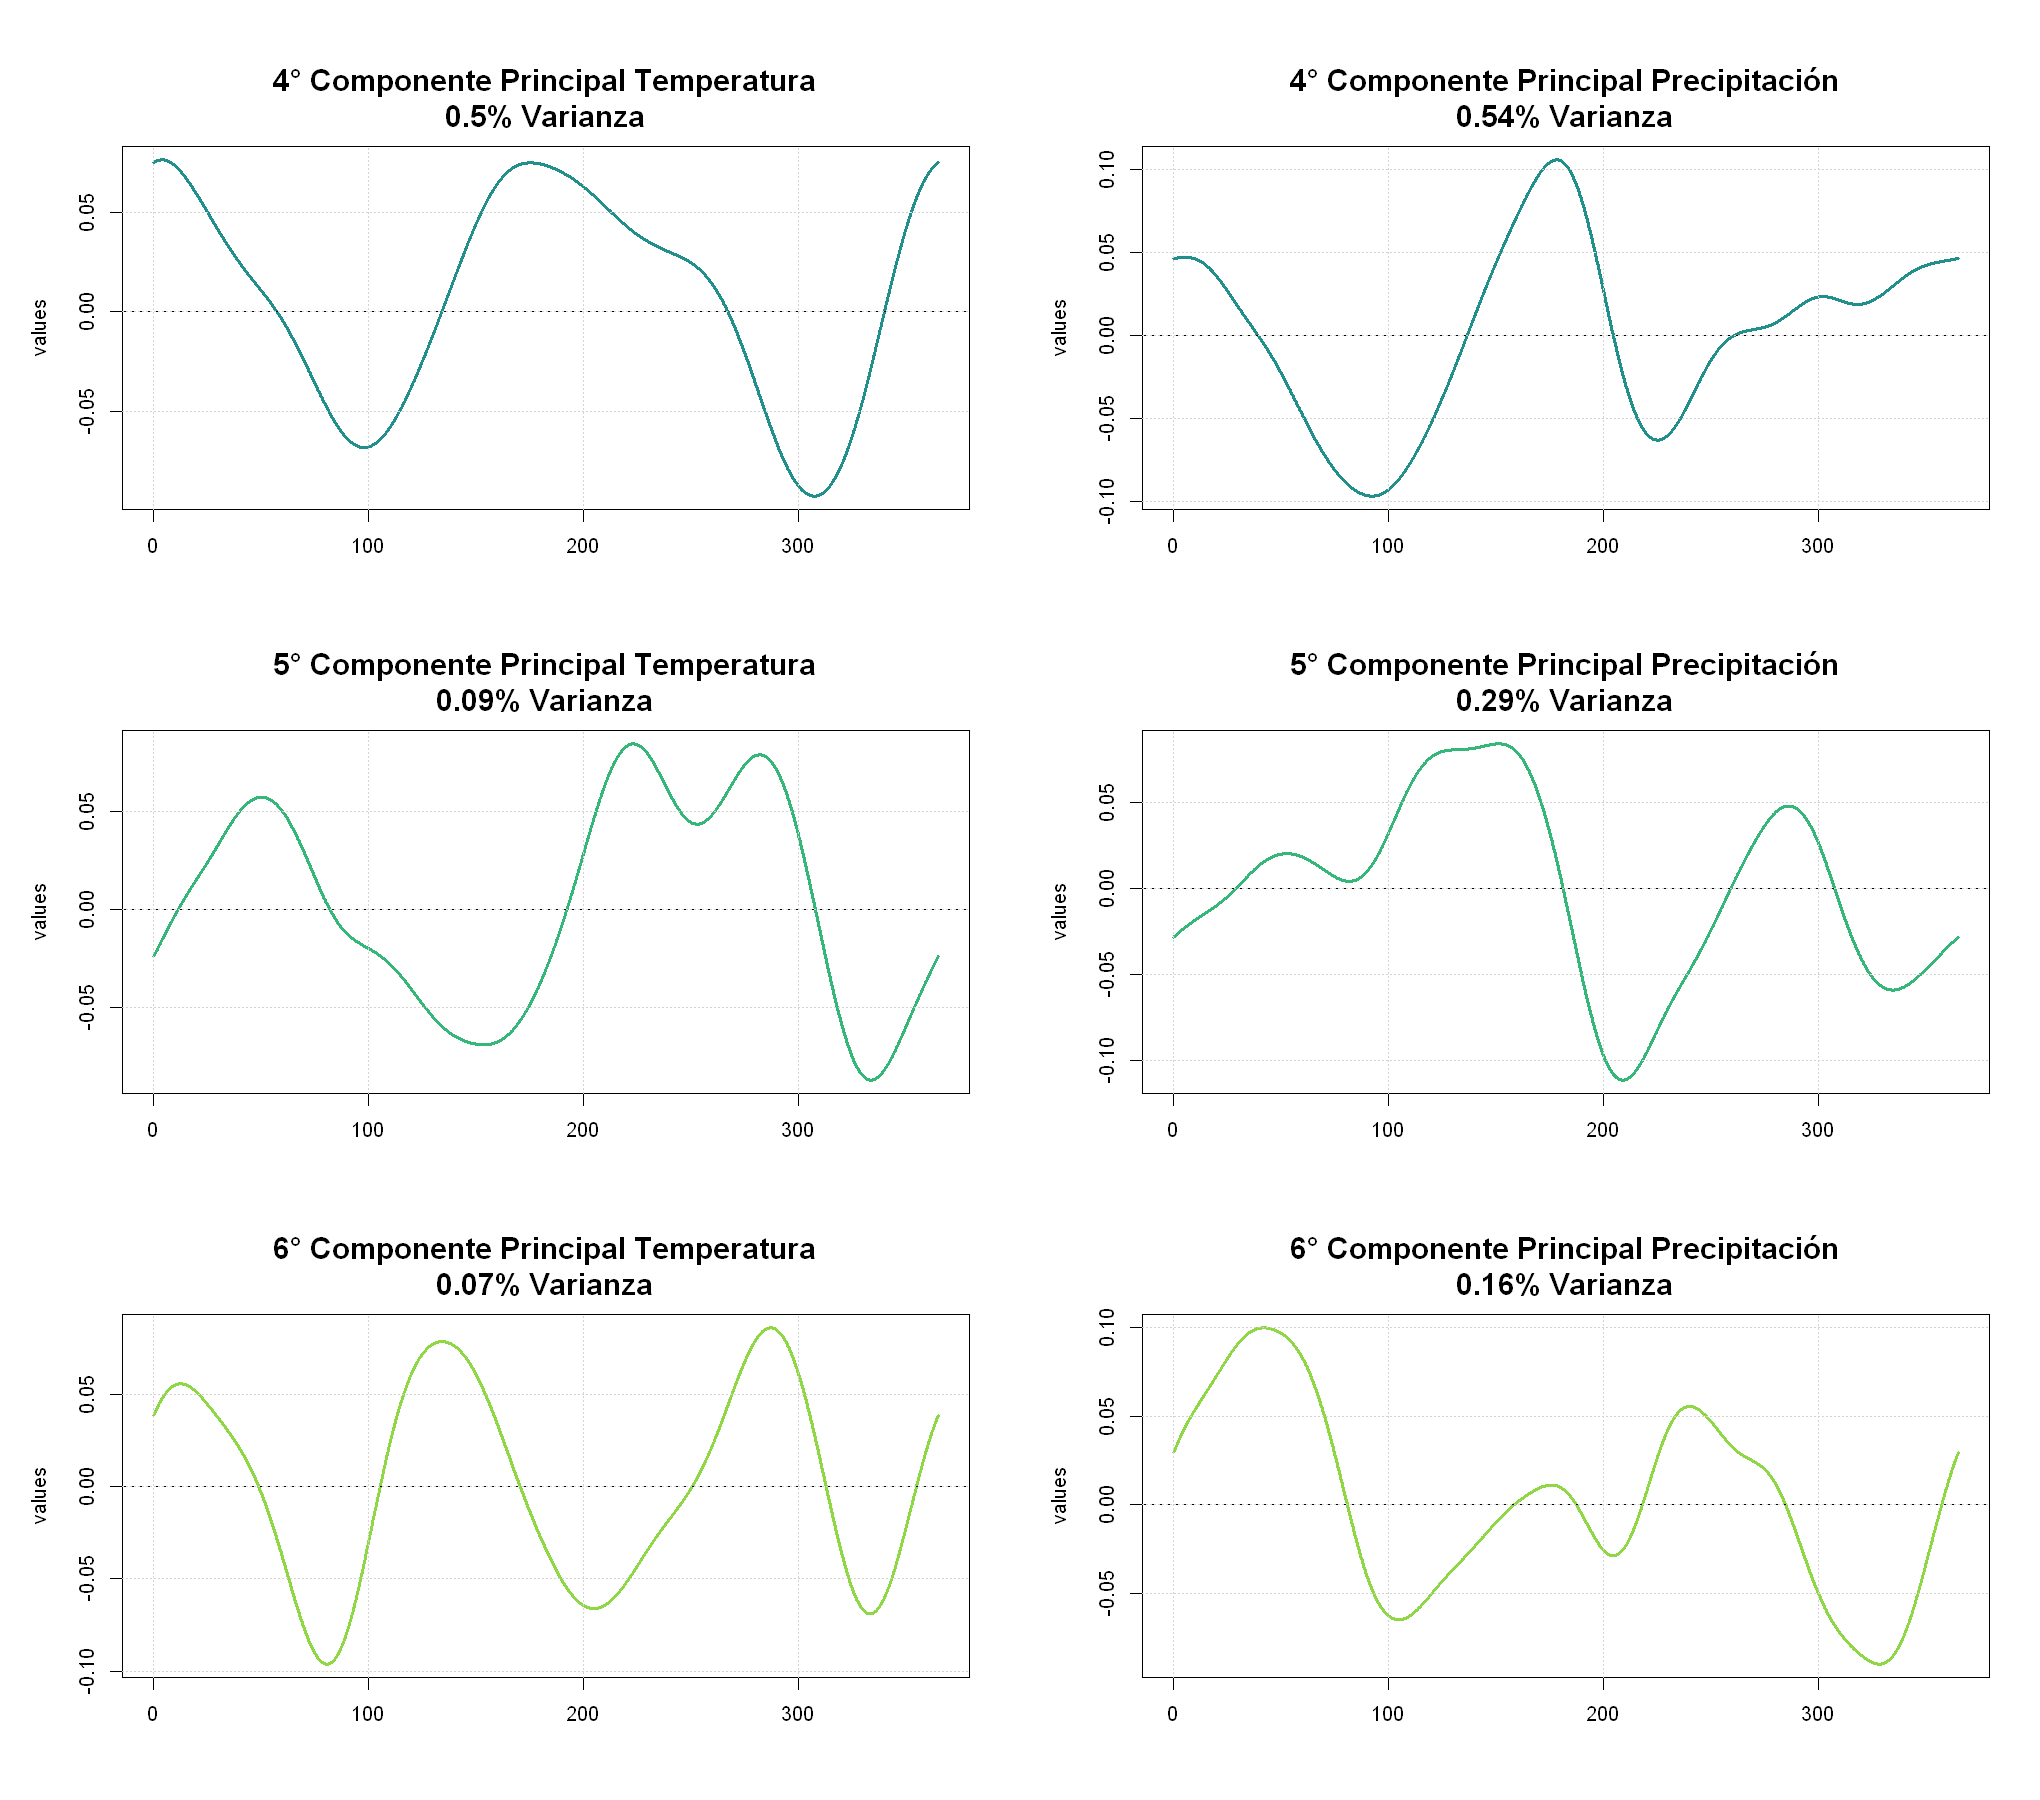

In [3]:
# Configuración de tamaño para Jupyter Notebook
options(repr.plot.width=17, repr.plot.height=15)
library(fda)
library(fields)  # Para image.plot
library(viridis)  # Para paletas de color mejoradas
library(knitr)  # Para crear tablas


# Centrado y Análisis de Componentes Principales
precfd.c <- center.fd(precfd)
tempfd.c <- center.fd(tempfd)

# Análisis de Componentes Principales
num_harm_temp <- 6  # Número de armónicos para temperatura
num_harm_prec <- 6  # Número de armónicos para precipitación

prec.pca <- pca.fd(precfd.c, nharm=num_harm_prec)
temp.pca <- pca.fd(tempfd.c, nharm=num_harm_temp)

# Cálculo de varianza explicada
var_exp_temp <- temp.pca$values / sum(temp.pca$values) * 100
var_exp_prec <- prec.pca$values / sum(prec.pca$values) * 100

# Crear tabla de varianza explicada
varianza_tabla <- data.frame(
  Componente = 1:5,
  Temperatura = round(var_exp_temp[1:5], 2),
  Precipitacion = round(var_exp_prec[1:5], 2)
)

# Imprimir tabla
kable(varianza_tabla, 
      caption = "Varianza Explicada por Componentes Principales",
      col.names = c("Componente", "Temperatura (%)", "Precipitación (%)"),
      format = "markdown")

# Resto del código de gráficas (opcional, puedes comentarlo si no lo necesitas)
par(mfrow=c(3,2),    # 3 filas, 2 columnas 
    mar=c(5,5,4,2) + 0.1,  # Márgenes internos  
    oma=c(0,0,2,0),  # Márgenes exteriores
    bg = "white",    # fondo blanco
    cex = 1,         # tamaño general
    cex.main = 1.5)  # tamaño títulos

# Graficar Componentes Principales de Temperatura
for(i in 1:num_harm_temp) {
  plot(temp.pca$harmonics[i],
       col=viridis(1, begin=(i-1)/num_harm_temp),
       lwd=3,
       main=paste0(i, "° Componente Principal Temperatura\n",
                   round(var_exp_temp[i], 2), "% Varianza"))
  grid()  # Añadir cuadrícula
   
  plot(prec.pca$harmonics[i],
       col=viridis(1, begin=(i-1)/num_harm_prec),
       lwd=3,
       main=paste0(i, "° Componente Principal Precipitación\n",
                   round(var_exp_prec[i], 2), "% Varianza"))
  grid()
}

### Cálculo de coeficientes de estimación

Warning message:
"package 'plot3D' was built under R version 4.4.3"


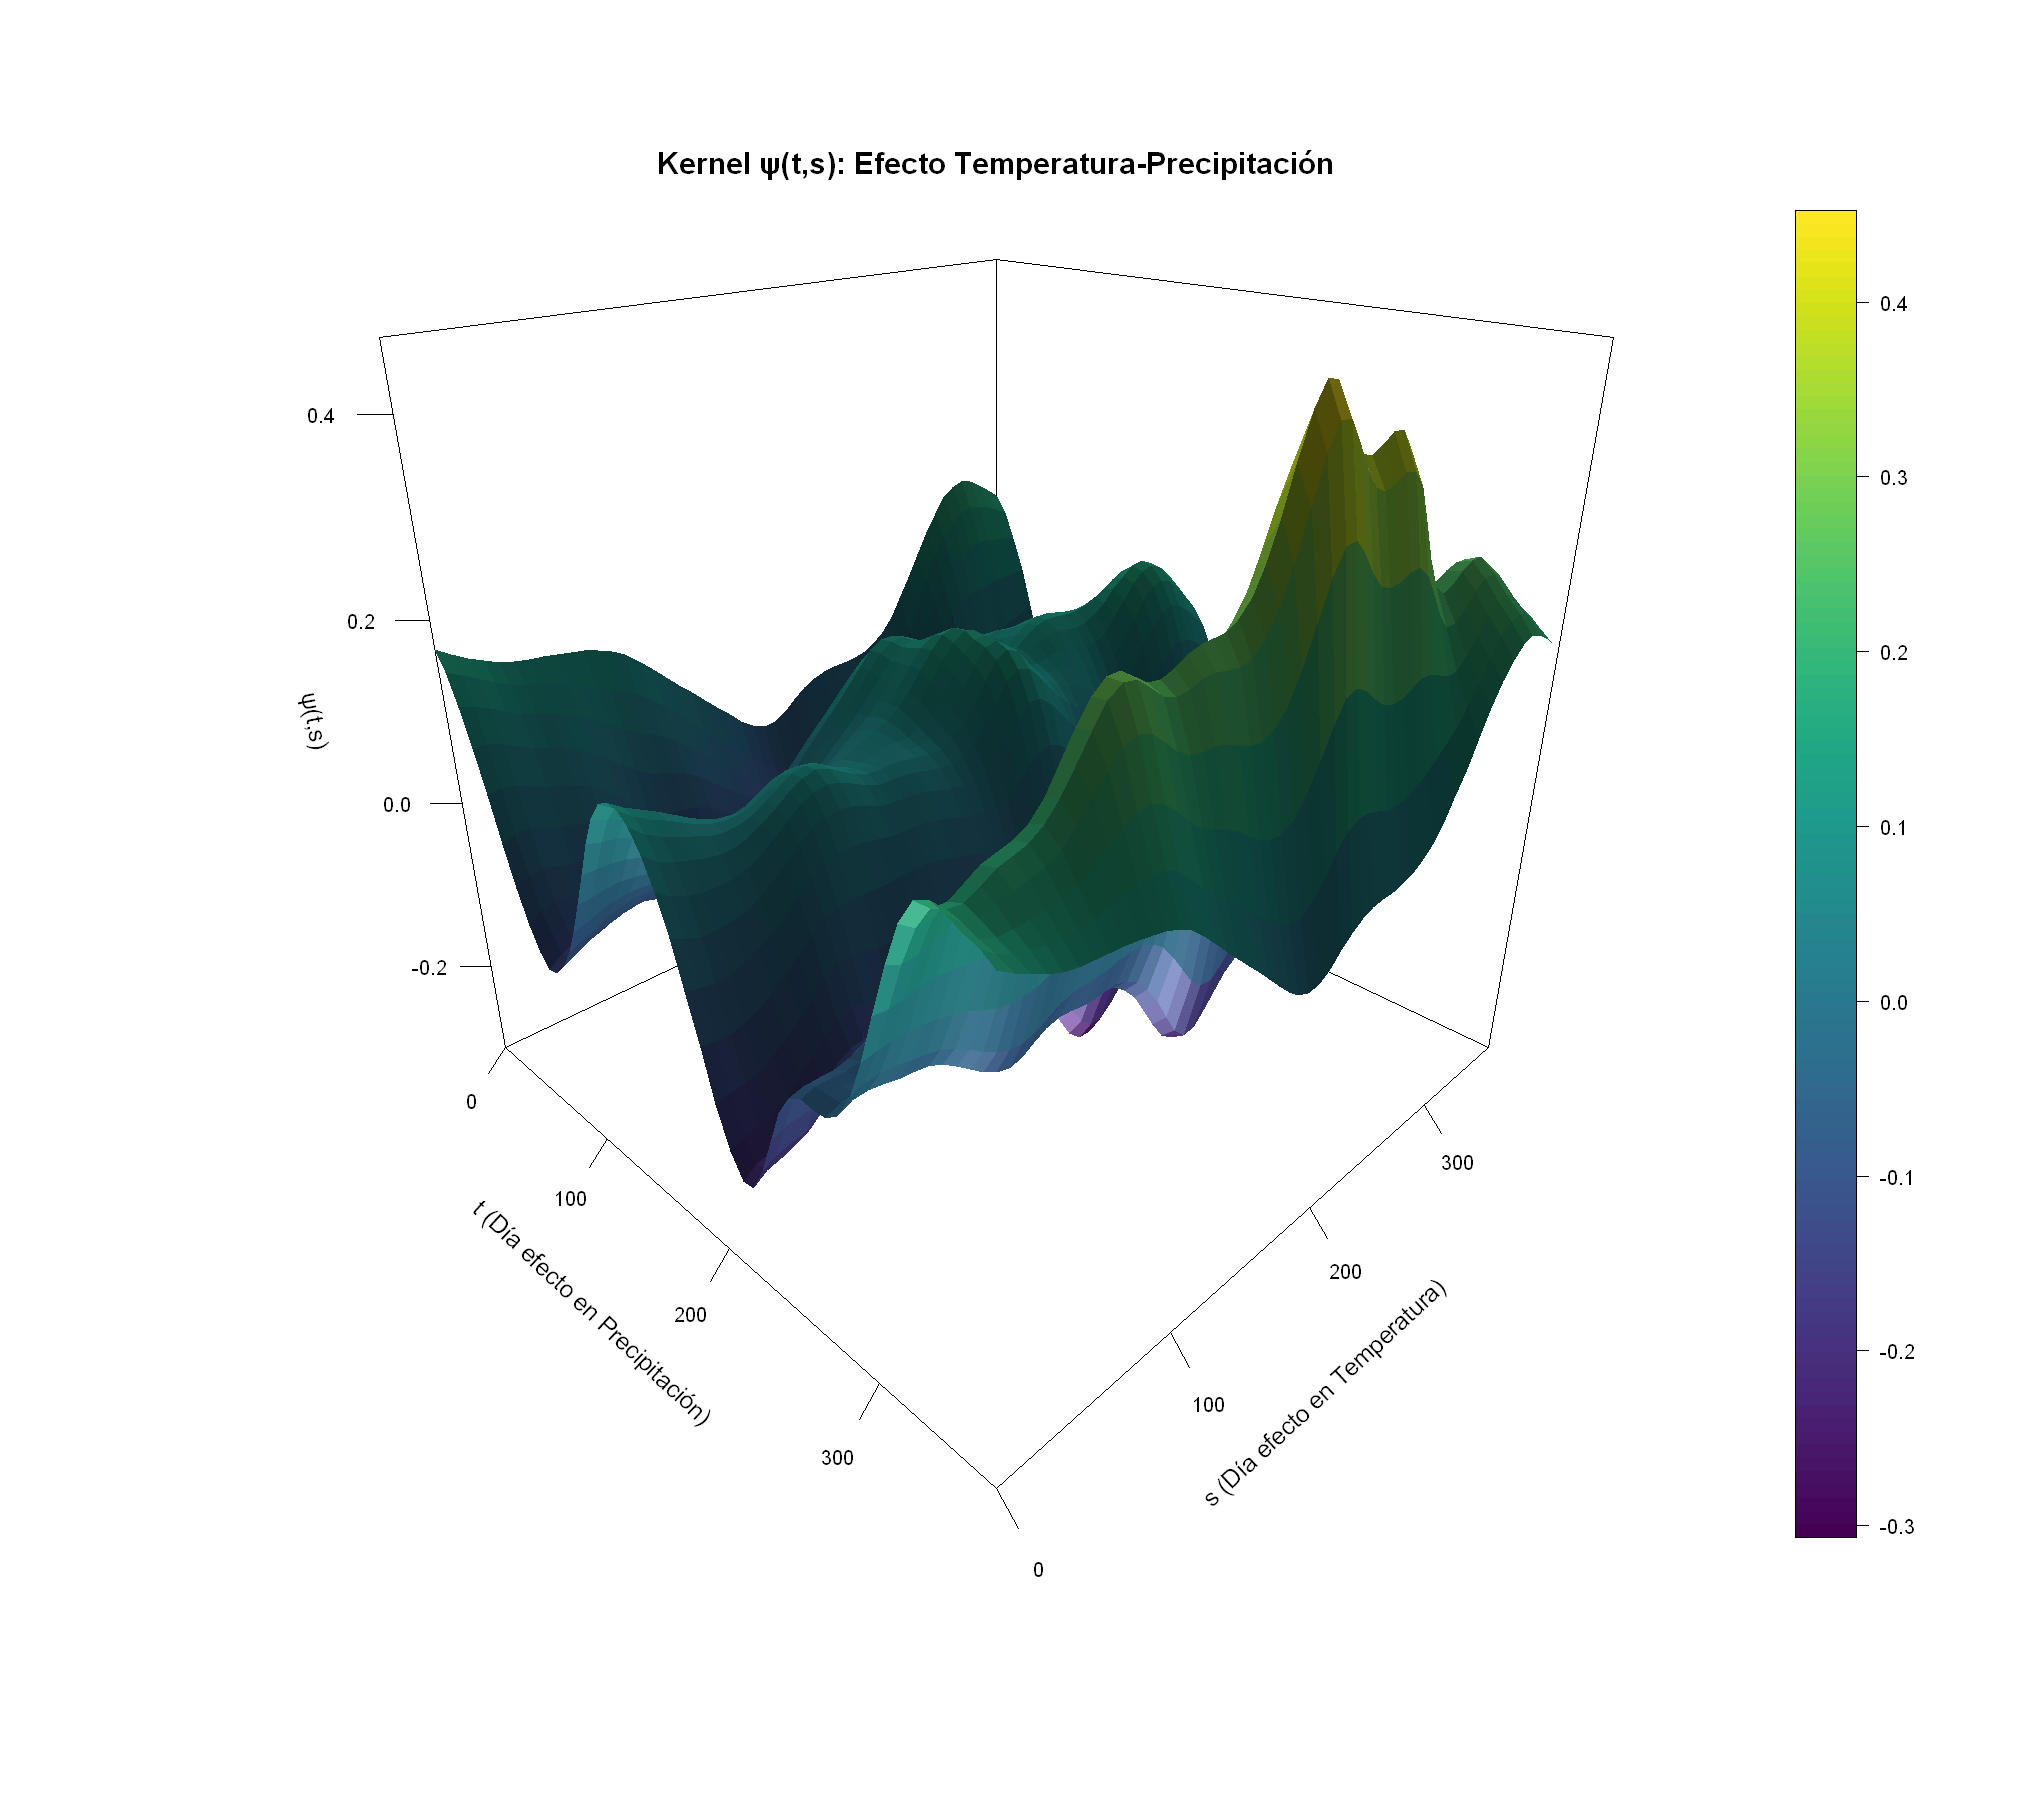

In [4]:
### Cálculo del kernel ψ(t,s) y gráfico 3D
# ---------------------------------------------------------
# Calcular coeficientes σ_ℓk / λ_ℓ
sigmas <- t(temp.pca$scores) %*% prec.pca$scores  # σ_ℓk = Cov(ξ_ℓ, ζ_k)
cs <- diag(1 / temp.pca$values[1:num_harm_temp]) %*% sigmas  # ψ_ℓk = σ_ℓk / λ_ℓ

# Construir el objeto bifd del kernel
beta.coefs <- temp.pca$harmonics$coefs %*% cs %*% t(prec.pca$harmonics$coefs)
beta.bifd <- bifd(beta.coefs, 
                 sbasisobj = temp.pca$harmonics$basis, 
                 tbasisobj = prec.pca$harmonics$basis)

# Crear una cuadrícula de evaluación (t, s)
n_grid <- 50
t_grid <- seq(0, 365, length.out = n_grid)
s_grid <- seq(0, 365, length.out = n_grid)

# Evaluar el kernel en la cuadrícula
psi_vals <- eval.bifd(t_grid, s_grid, beta.bifd)

# Configurar paleta de colores
library(viridis)
col_pal <- viridis(100)

# Gráfico 3D con ejes etiquetados y título
library(plot3D)
par(bg = "white")
persp3D(x = t_grid, y = s_grid, z = psi_vals,
        theta = 45, phi = 25,  # Ángulos de vista
        col = col_pal, 
        shade = 0.5,
        lighting = TRUE,
        ticktype = "detailed",
        xlab = "\n t (Día efecto en Precipitación)", 
        ylab = "\n s (Día efecto en Temperatura)", 
        zlab = "\n ψ(t,s)", 
        main = "Kernel ψ(t,s): Efecto Temperatura-Precipitación",
        border = NA,
        cex.main = 1.5,
        cex.lab = 1.2)
        

# 4

 Function-on-Function Regression (FoFR): Theory and Implementation

---

 **1. Model Formulation**
The **Function-on-Function Regression (FoFR)** models the relationship between a functional response $ Y_i(t) $ and one or more functional predictors $ X_i(s) $. The general model is:

$$
Y_i(t) = \alpha(t) + \sum_{p=1}^P \int_{S_p} X_{ip}(s) \beta_p(s, t) \, ds + \epsilon_i(t),
$$

- $ Y_i(t) $: Functional response for observation $ i $, evaluated at $ t \in T $.
- $ X_{ip}(s) $: $ p $-th functional predictor for observation $ i $, evaluated at $ s \in S_p $.
- $ \beta_p(s, t) $: Bivariate coefficient function for the $ p $-th predictor, linking $ X_{ip}(s) $ to $ Y_i(t) $.
- $ \alpha(t) $: Functional intercept.
- $ \epsilon_i(t) $: Functional error term, typically Gaussian with $ \epsilon_i(t) \sim N(0, \sigma^2) $.

---

 **2. Basis Expansions and Regularization**

 **Tensor Product Basis for $ \beta(s, t) $**
To estimate $ \beta(s, t) $, it is approximated using a **tensor product of basis functions**:
$$
\beta(s, t) = \sum_{k=1}^{K} \sum_{m=1}^{M} \theta_{km} B_k(s) C_m(t),
$$
where:
- $ B_k(s) $: Basis functions for $ s $ (e.g., cubic B-splines, Fourier).
- $ C_m(t) $: Basis functions for $ t $.
- $ \theta_{km} $: Coefficients to estimate.

 **Penalized Least Squares Estimation**
Coefficients $ \theta_{km} $ are estimated by minimizing:
$$
\text{PLSSE} = \underbrace{\sum_{i=1}^n \int_T \left[ Y_i(t) - \alpha(t) - \sum_p \int_{S_p} X_{ip}(s)\beta_p(s,t)ds \right]^2 dt}_{\text{Goodness-of-Fit}} + \underbrace{\sum_p \lambda_{s,p} J_s(\beta_p) + \lambda_{t,p} J_t(\beta_p)}_{\text{Penalty}},
$$
where $ J_s(\beta_p) = \int_S \int_T \left( \frac{\partial^2 \beta_p}{\partial s^2} \right)^2 ds\,dt $ and $ J_t(\beta_p) = \int_S \int_T \left( \frac{\partial^2 \beta_p}{\partial t^2} \right)^2 ds\,dt $.

**Key Equations**:
- Smoothing parameters $ \lambda_{s,p}, \lambda_{t,p} $ control the trade-off between fit and smoothness.
- The solution is obtained via **generalized ridge regression**.


 Function-on-Function Regression (FoFR): Explicación Teórica

 1. **Contexto y Definición**
El **Function-on-Function Regression (FoFR)** es un modelo de regresión en el análisis de datos funcionales (FDA) donde tanto la **variable respuesta** como la **variable predictora** son funciones. Su objetivo es modelar la relación entre trayectorias funcionales, permitiendo predecir una curva respuesta completa a partir de una o múltiples curvas predictoras.

**Ecuación general**:
$$
W_i(s) = f_0(s) + \int_{U} X_i(u) \beta(s, u) \, du + \epsilon_i(s)
$$
- $W_i(s)$: Función respuesta para el individuo $i$ en el dominio $s$.
- $X_i(u)$: Función predictora para el individuo $i$ en el dominio $u$.
- $\beta(s, u)$: Coeficiente bivariado que cuantifica cómo $X_i(u)$ en $u$ afecta a $W_i(s)$ en $s$.
- $\epsilon_i(s)$: Error funcional (asumido gaussiano con media cero).

---

 2. **Interpretación del Coeficiente $\beta(s, u)$**
- **Relación espacio-temporal**:  
  $\beta(s, u)$ captura cómo los valores pasados/futuros de $X_i(u)$ influyen en $W_i(s)$. Por ejemplo:
  - Si $\beta(s, u) > 0$: Un aumento en $X_i(u)$ predice un aumento en $W_i(s)$.
  - Si $\beta(s, u) < 0$: Indica una relación inversa.
  
- **Dominios alineados vs. no alineados**:  
  - Si $s = u$: Efecto contemporáneo (e.g., mortalidad semanal en la misma semana).  
  - Si $s > u$: Efecto predictivo (e.g., mortalidad pasada afectando mortalidad futura).

---

 3. **Estimación con Splines Penalizados**
 3.1. **Expansión en Bases**
El coeficiente $\beta(s, u)$ se aproxima mediante una **combinación lineal de bases bivariadas** (e.g., tensor product de B-splines):
$$
\beta(s, u) = \sum_{k_1=1}^{K_1} \sum_{k_2=1}^{K_2} \theta_{k_1k_2} B_{k_1}(s) B_{k_2}(u)
$$
- $B_{k_1}(s)$, $B_{k_2}(u)$: Funciones base univariadas.
- $\theta_{k_1k_2}$: Coeficientes a estimar.

 3.2. **Penalización por Suavidad**
Se aplican penalizaciones para evitar sobreajuste y garantizar suavidad:
$$
\text{Penalidad} = \lambda_s \int \left(\frac{\partial^2 \beta}{\partial s^2}\right)^2 ds + \lambda_u \int \left(\frac{\partial^2 \beta}{\partial u^2}\right)^2 du
$$
- $\lambda_s, \lambda_u$: Parámetros de suavizado (optimizados via REML o GCV).

---

 4. **Aplicaciones en los Ejemplos del Contexto**
 
- **Objetivo**: Predecir mortalidad semanal post-23/May/2020 usando datos previos.
- **Interpretación de $\beta(s, u)$**:  
  - $u \in [1, 20]$ (semanas iniciales), $s \in [21, 52]$ (semanas futuras).  
  - Valores altos de $\beta(s, u)$ en $u=18-20$ y $s=21-24$ indican que estados con alta mortalidad en semanas 18-20 tuvieron alta mortalidad en semanas 21-24.


In [5]:
# ----------------------------------------------------------
# Replicación de la Figura 6.3: Intercepto funcional con IC 95%
# ----------------------------------------------------------

library(refund)
library(ggplot2)

# Cargar datos
load("../Data/COVID19.rda")
Wd <- COVID19$States_excess_mortality


#Define wherepredictionisdone
cutoff <-20
#Create thepredictorandoutcomematrices
X <-Wd[,1:cutoff]
W <-Wd[,(cutoff + 1):dim(Wd)[2]]
#Create theargumentsofthepredictorandoutcomefunctions
s <-1:cutoff
t <-(cutoff + 1):dim(Wd)[2]
#Fit pffrwithonefunctionalpredictor
m1 <- pffr(W ~ ff(X,xind =s),yind=t)

Warning message:
"package 'refund' was built under R version 4.4.3"


In [6]:
#Extract allthecoefficientinformation
allcoef <- coef(m1)
#Extract domain-invariantintercept
intercept_fixed <-allcoef$pterms[1]
#Extract thedomain-varyingintercept
intercoef <-allcoef$smterms$Intercept$coef
#Obtain anestimatoroff 0()
intersm <-intercept_fixed + intercoef$value
#Obtain thestandarderrorofthedomain-varyingintercept
interse <-intercoef$se

using seWithMean for  s(t.vec) .


In [7]:
#Extract thesmoothcoefficients,storedasavector
smcoef <-allcoef$smterms$`ff(X,s)`$value
#Extract thepredictorfunctionalarguments
xsm <-allcoef$smterms$`ff(X,s)`$x
#Extract theoutcomefunctionalarguments
ysm <-allcoef$smterms$`ff(X,s)`$y
#Transform thesmoothcoefficientsintoamatrix
smcoef <- matrix(smcoef, nrow= length(xsm))

In [8]:
#Extract thefittedvalues
fitted_values <- fitted(m1)
#Extract theresiduals
residual_values <- residuals(m1)

using seWithMean for  s(t.vec) .
[1] "Longitud de t: 32"
[1] "Longitud de intersm: 100"
[1] "Longitud de interse: 100"


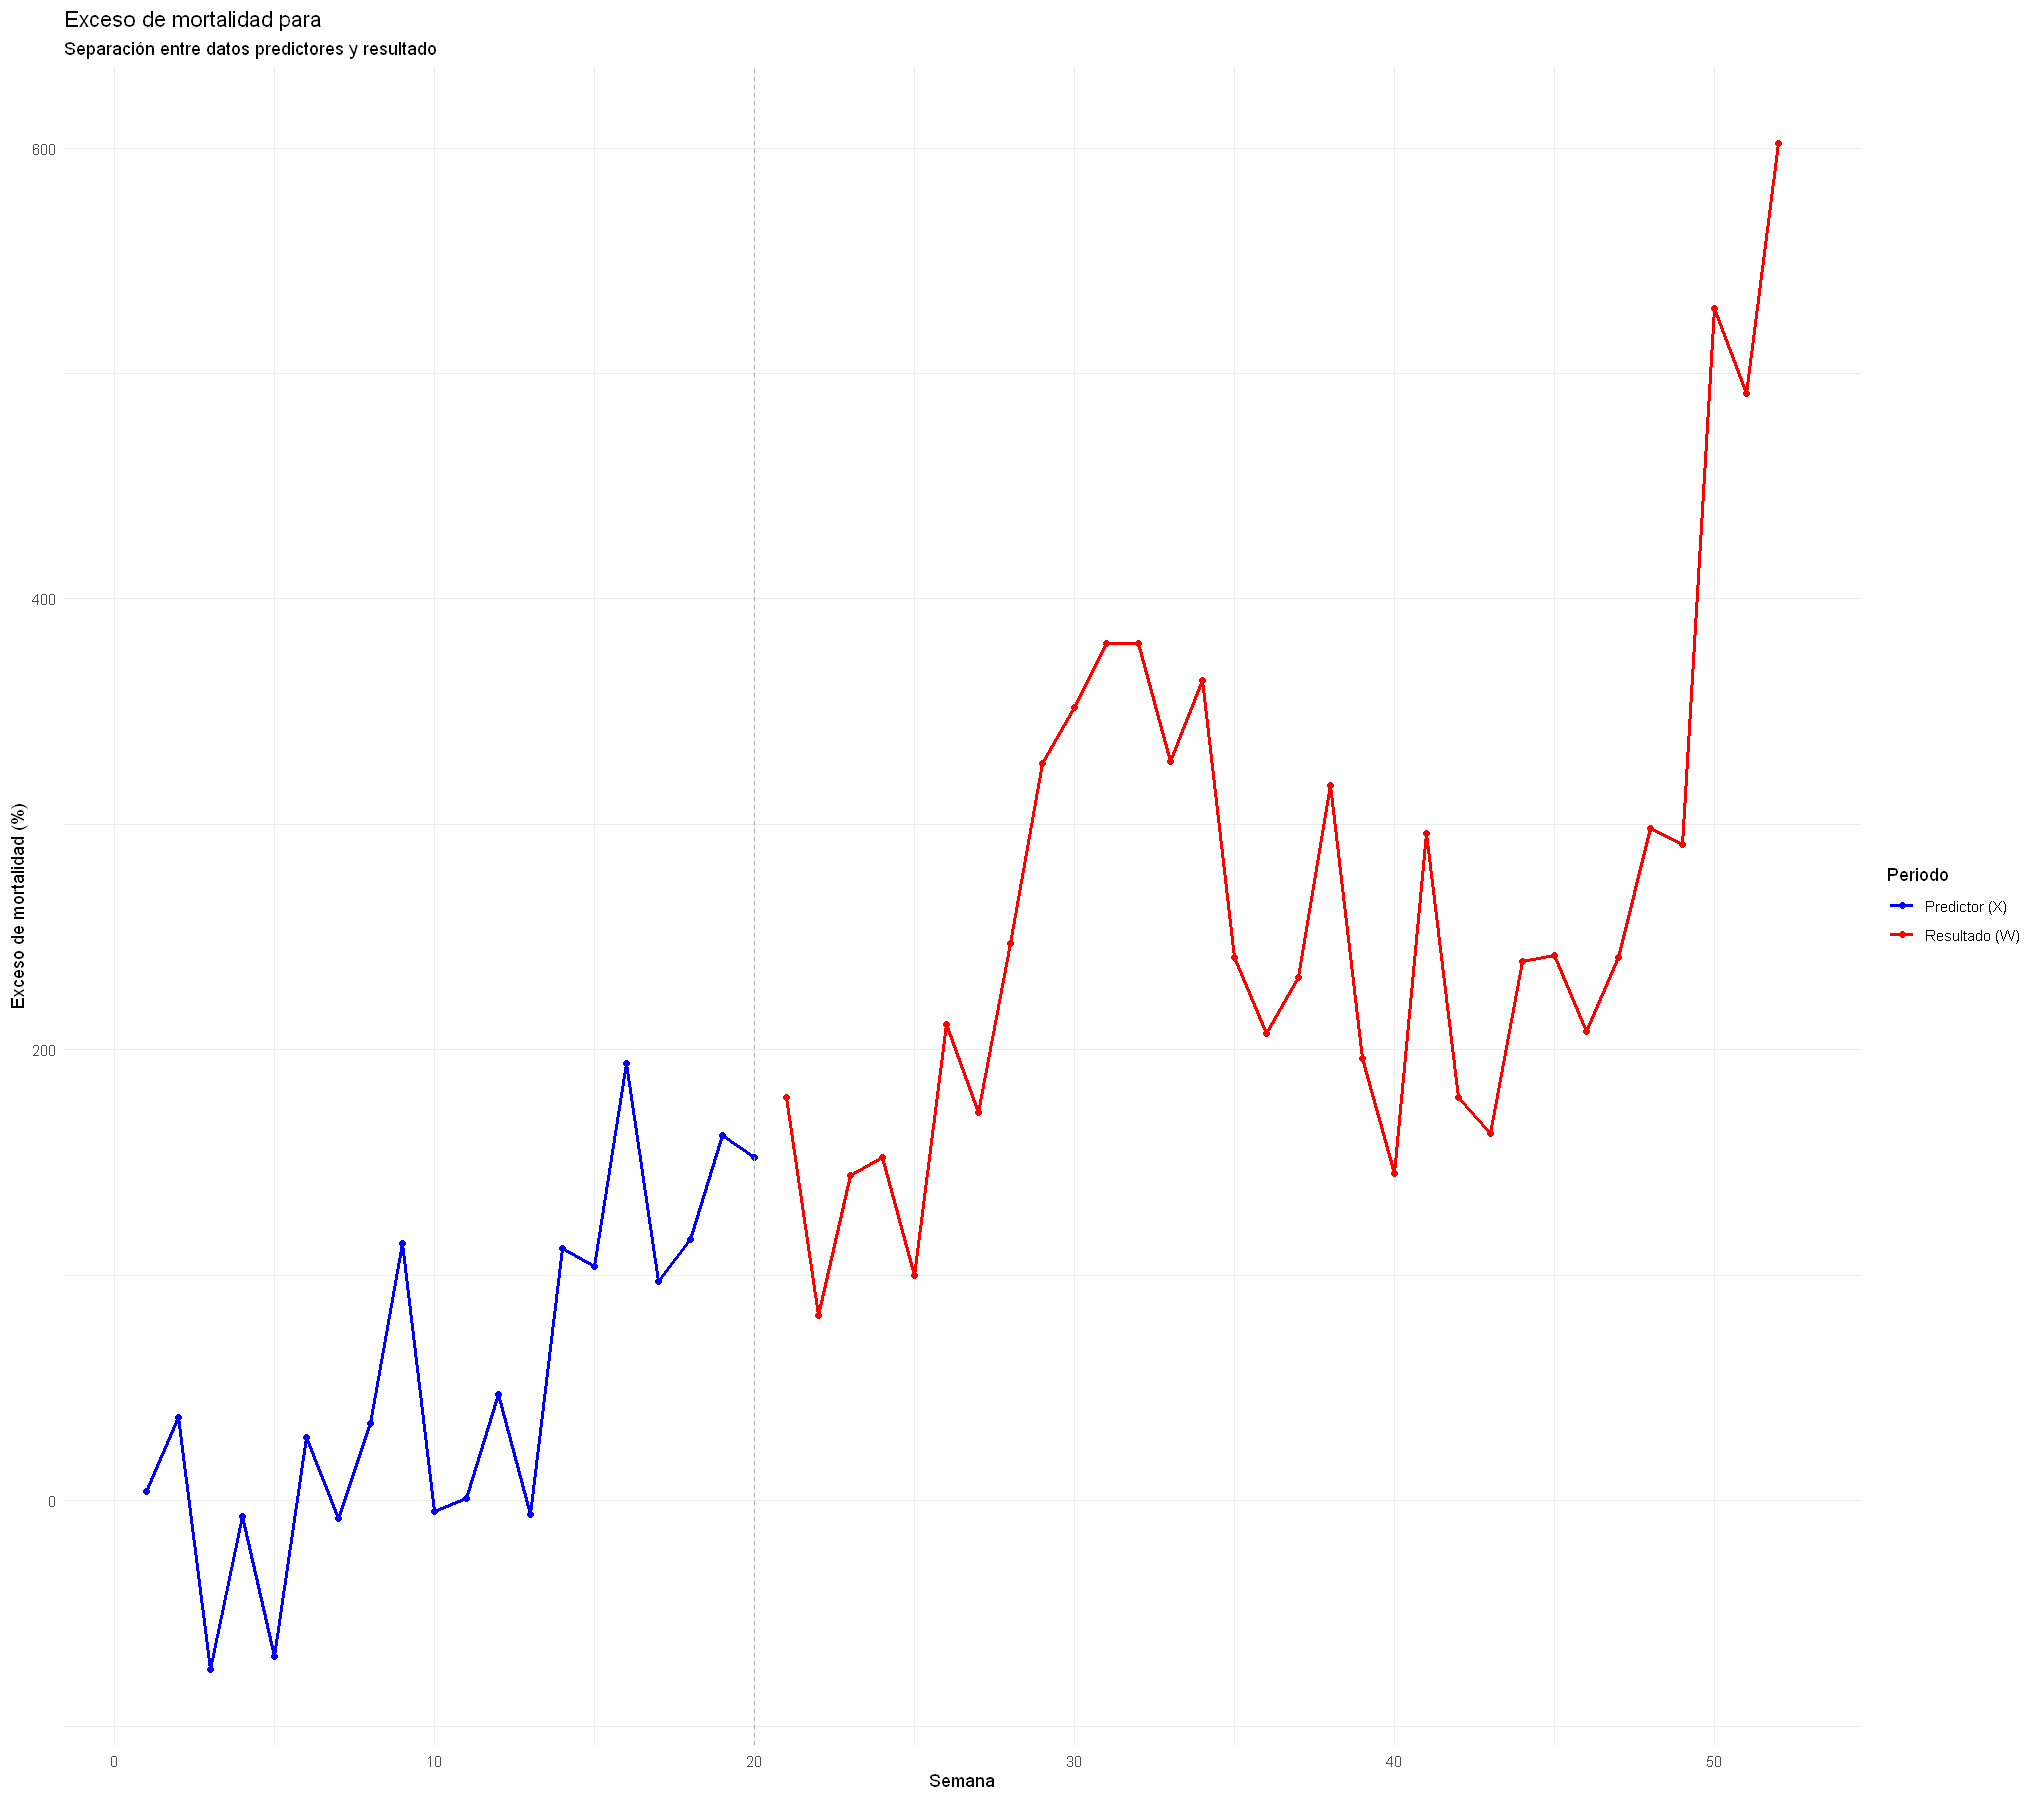

[1] "Dimensiones de x_grid: 40"
[1] "Dimensiones de y_grid: 40"
[1] "Dimensiones de z_values: 40 x 40"


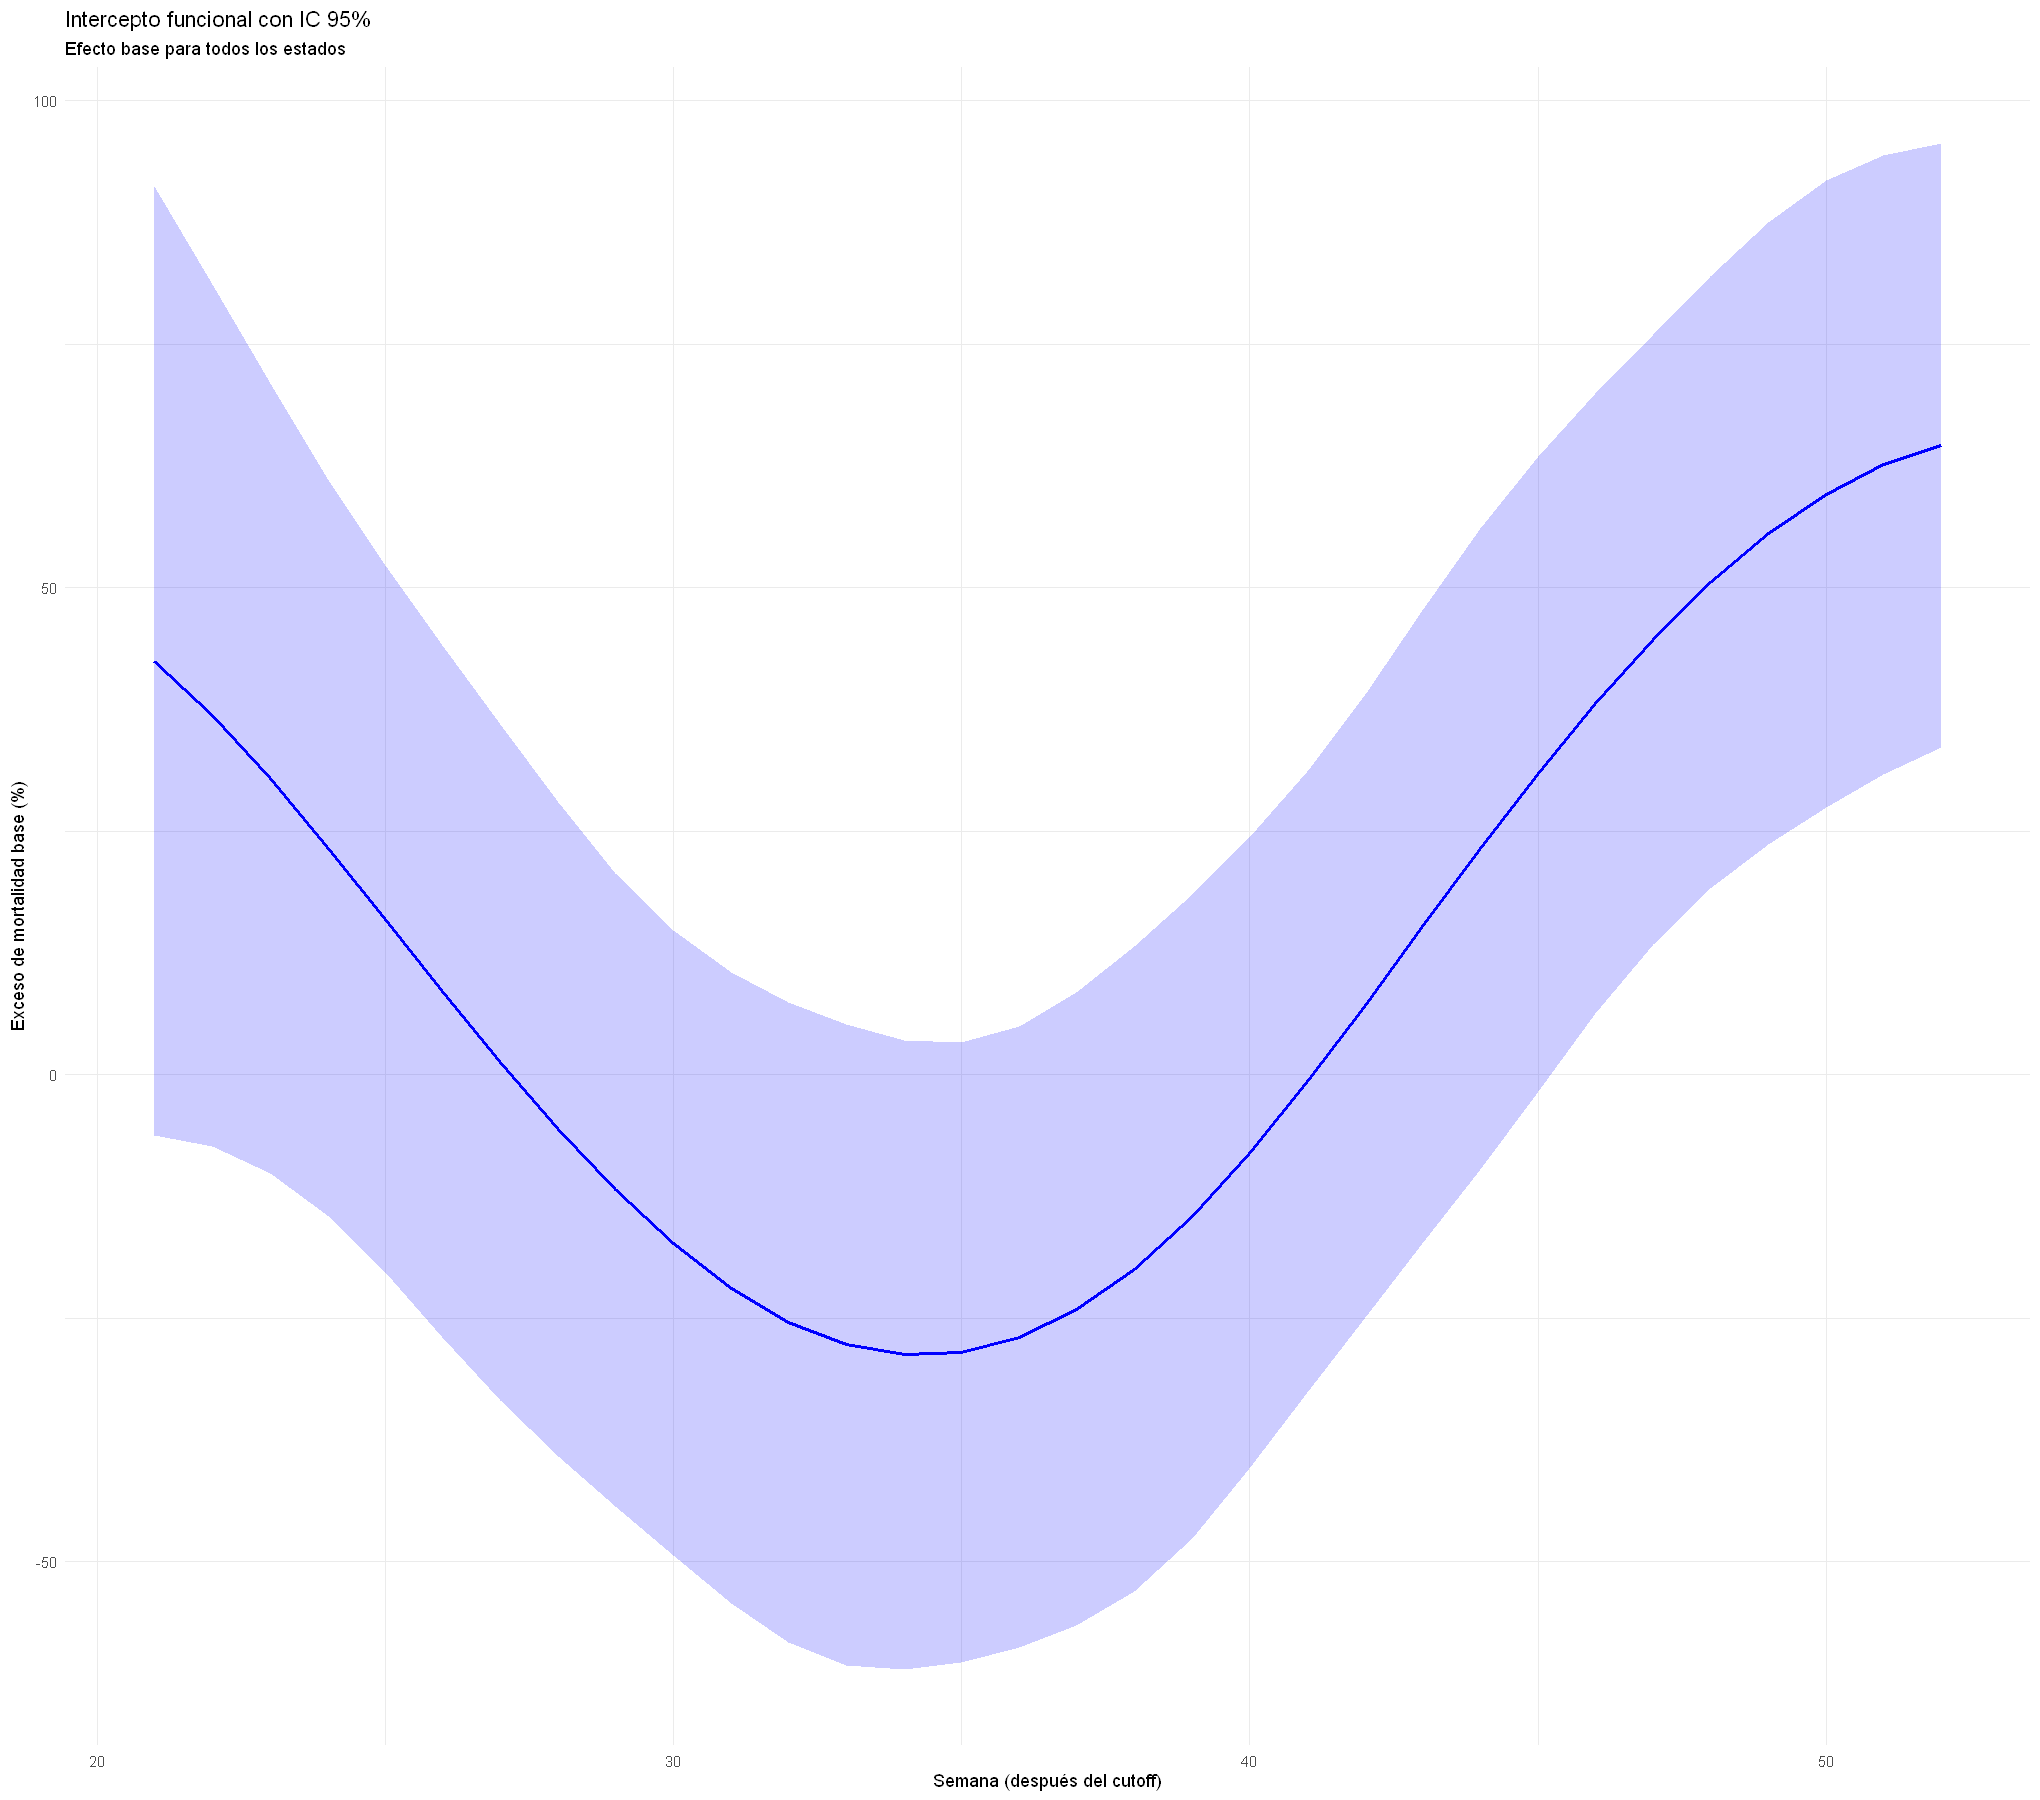

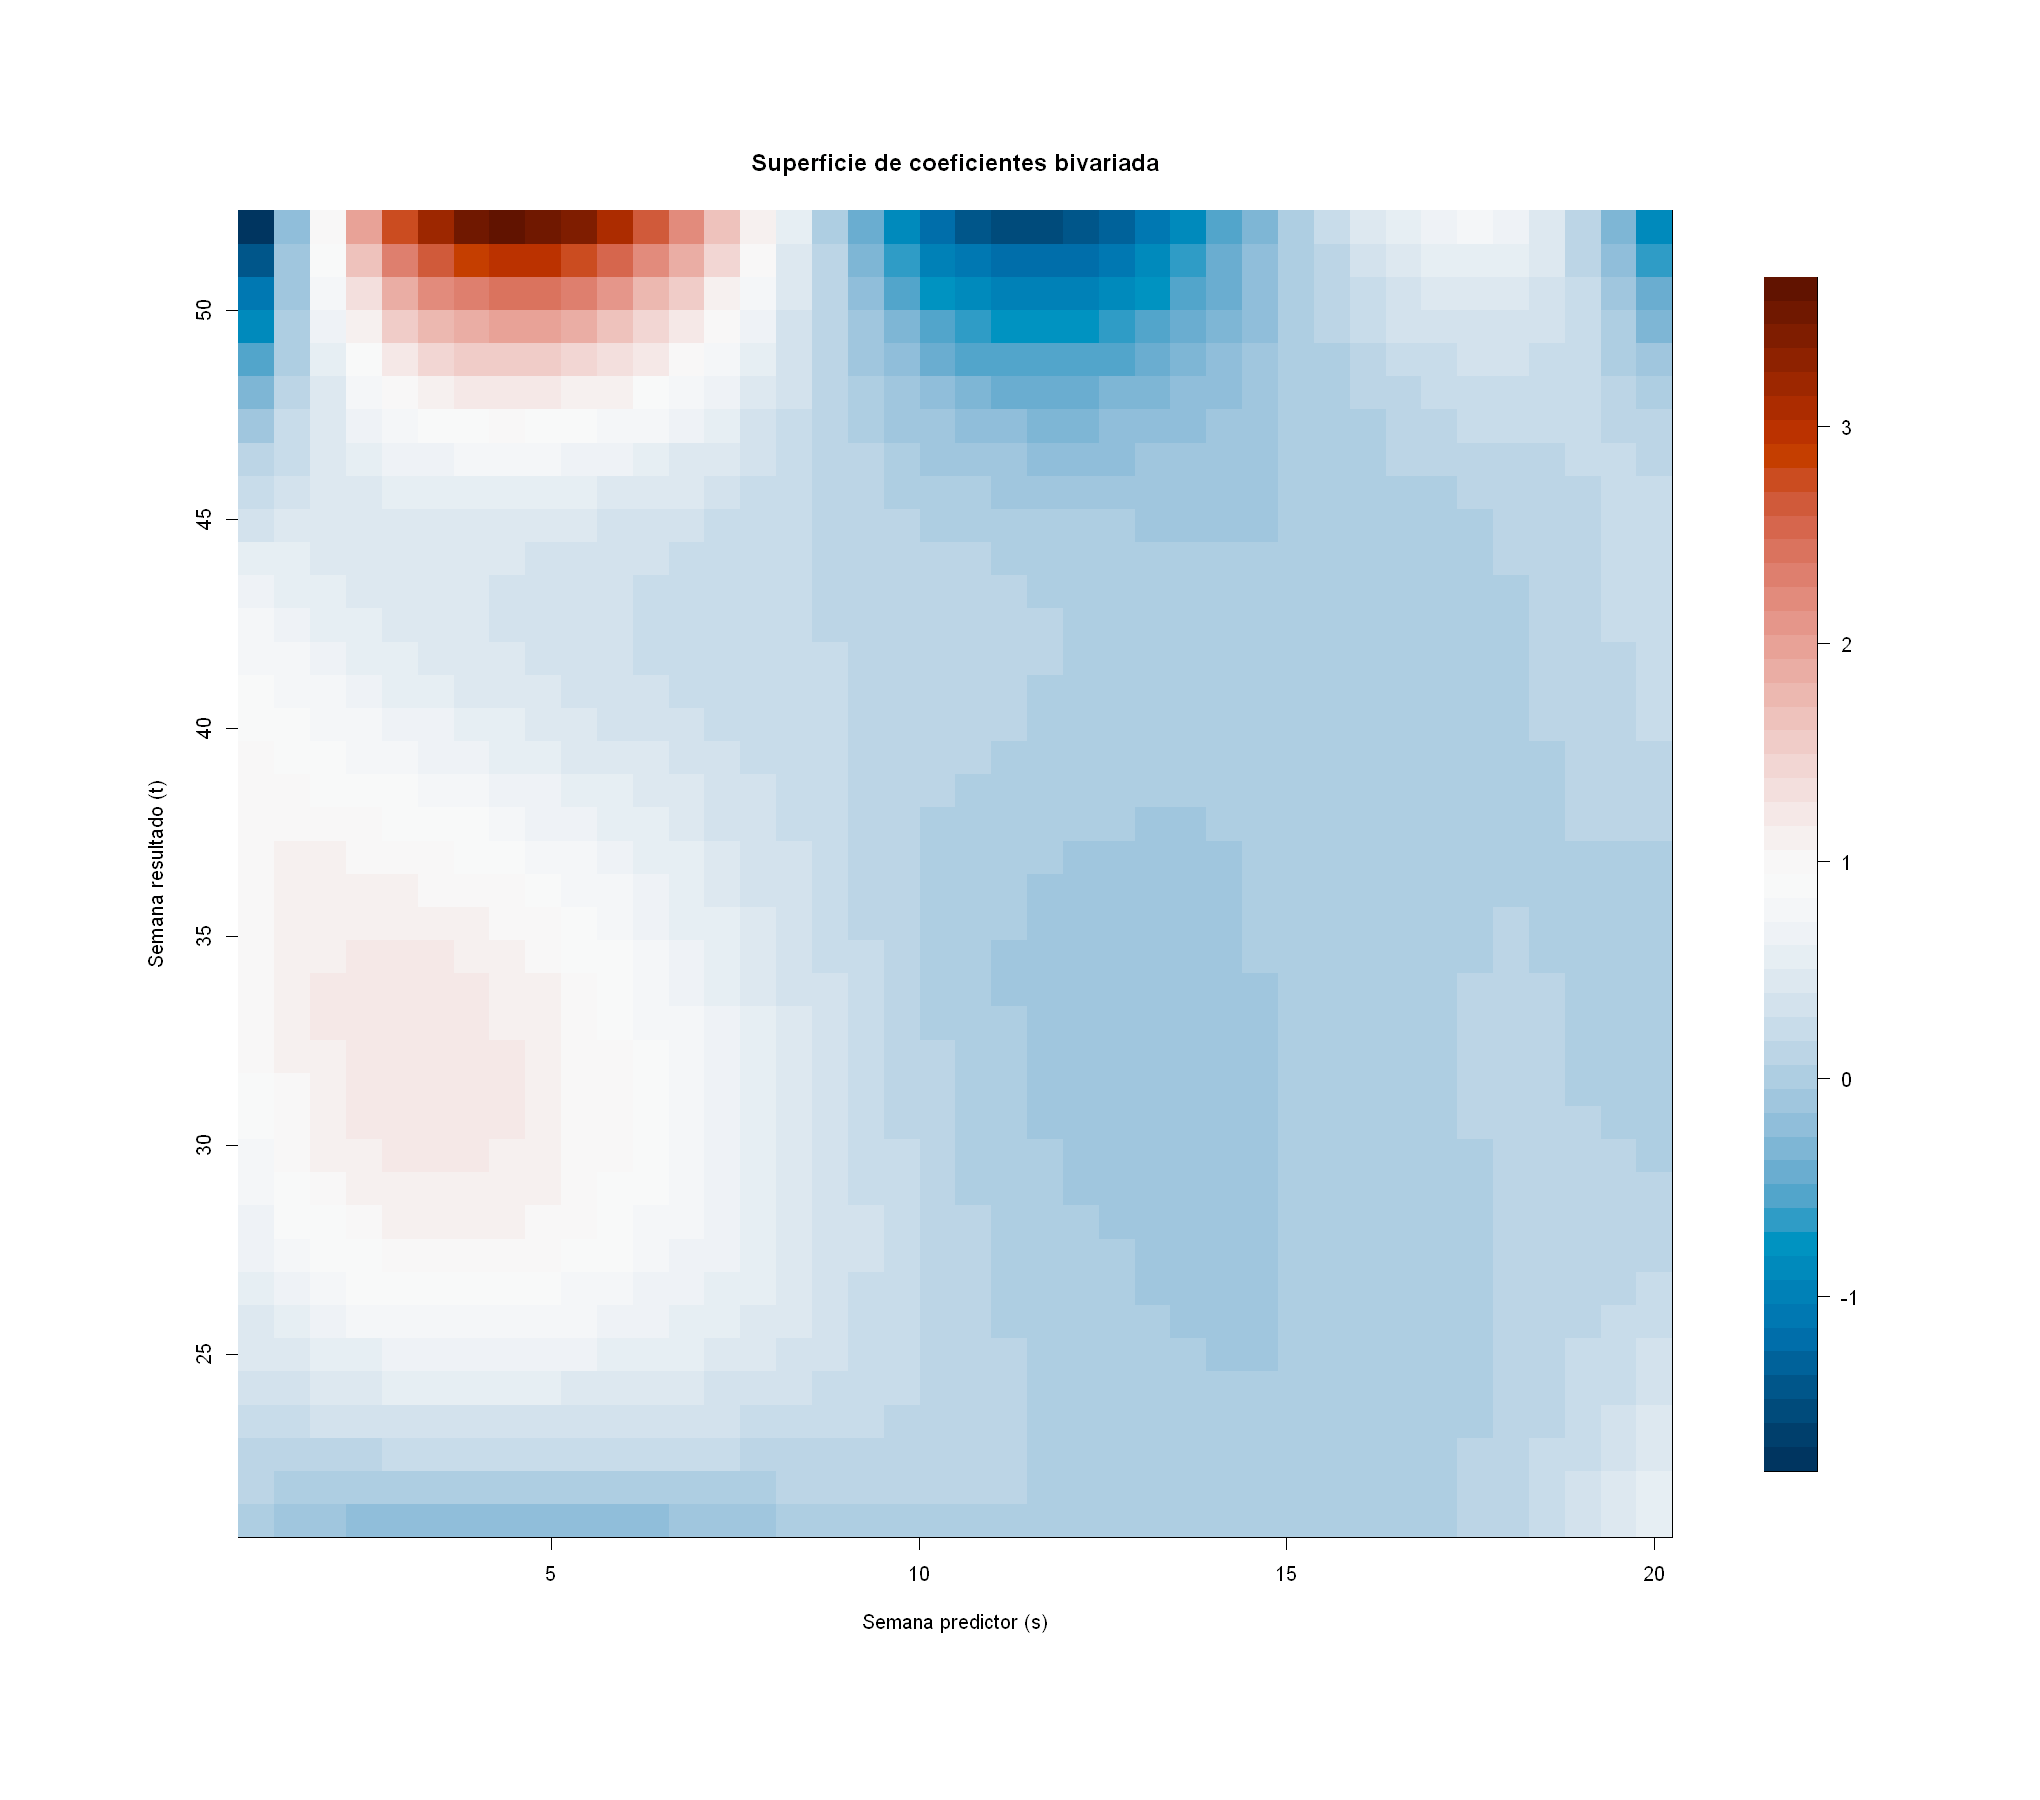

[1] "Dimensiones de W: 52 x 32"
[1] "Dimensiones de fitted_values: 52 x 32"


ERROR: Error in data.frame(Semana = t, Observado = W[i, ], Ajustado = fitted_values[i, : los argumentos implican un número diferente de filas: 32, 0


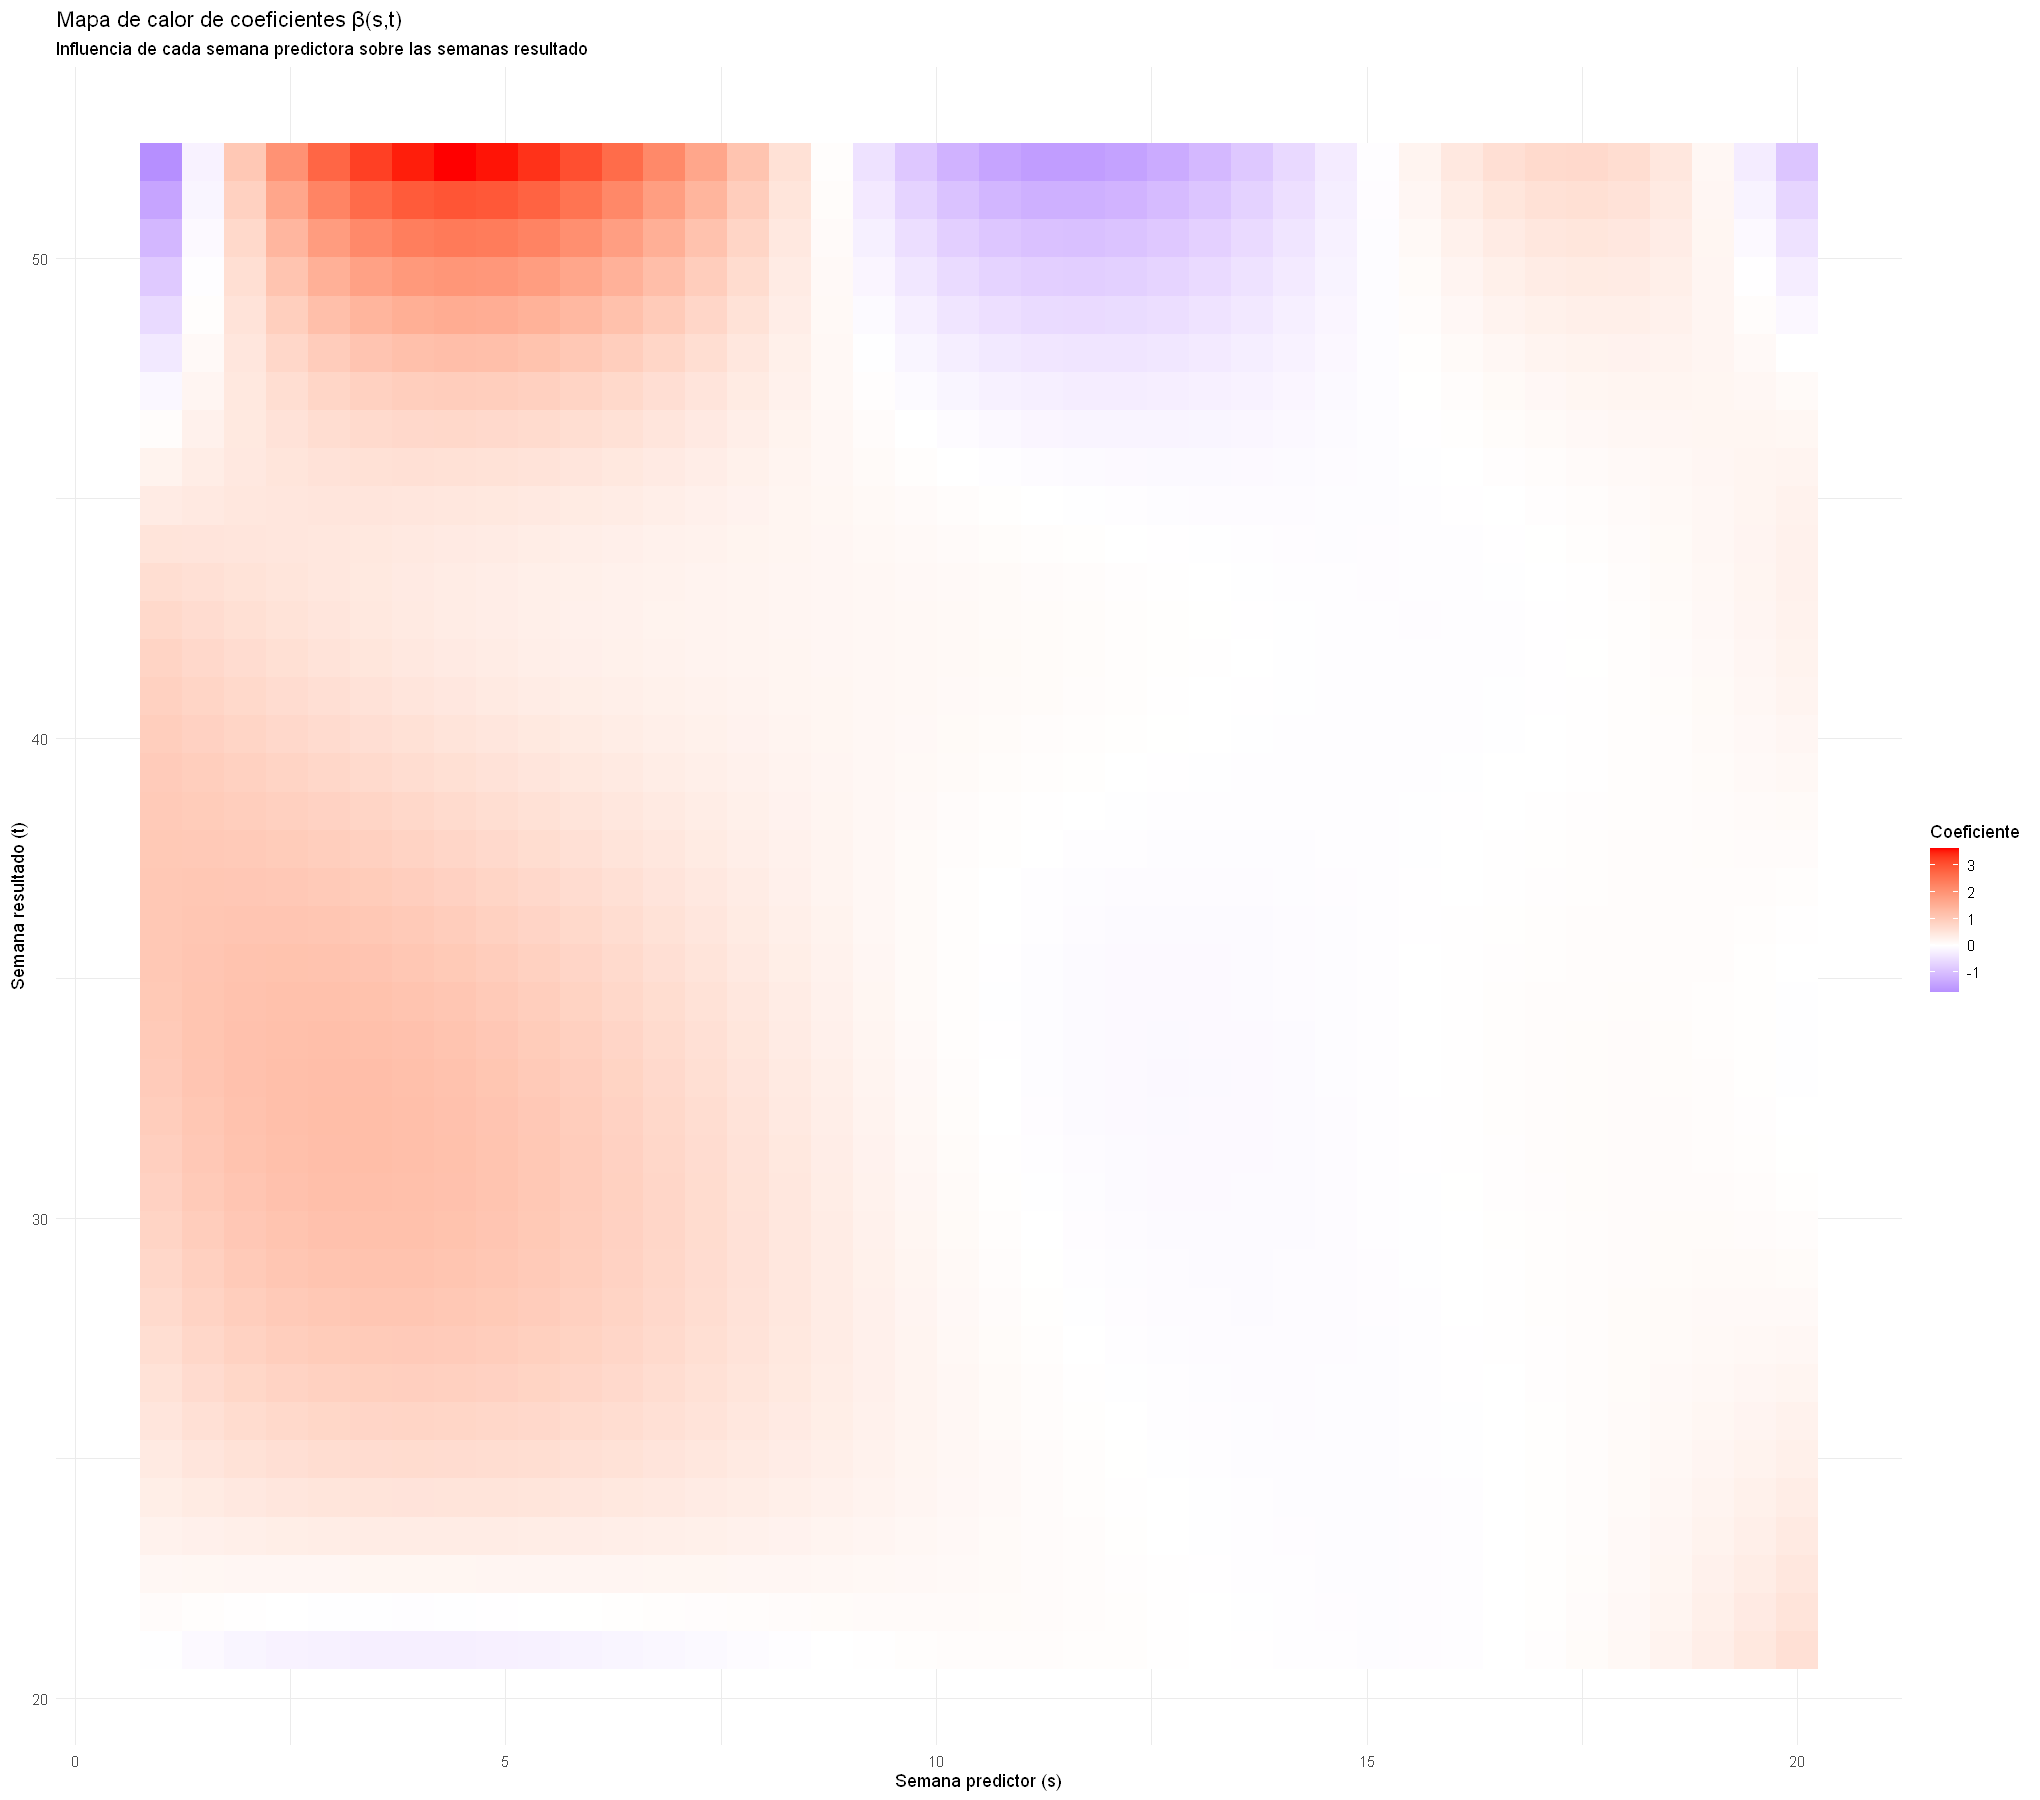

In [12]:
# ----------------------------------------------------------
# Replicación de la Figura 6.3: Intercepto funcional con IC 95%
# ----------------------------------------------------------
library(refund)
library(ggplot2)
library(dplyr)
library(fields)  # Para gráficos de superficie
library(gridExtra) # Para organizar múltiples gráficos

# Cargar datos
load("../Data/COVID19.rda")
Wd <- COVID19$States_excess_mortality

# Visualización de las funciones para un estado específico
estado_ejemplo <- 1  # Puedes cambiar este número para ver diferentes estados
nombre_estado <- COVID19$States_names[estado_ejemplo]

# Crear un dataframe para visualizar los datos del estado seleccionado
datos_estado <- data.frame(
  Semana = 1:ncol(Wd),
  ExcesoMortalidad = as.numeric(Wd[estado_ejemplo,]),
  Periodo = ifelse(1:ncol(Wd) <= 20, "Predictor (X)", "Resultado (W)")
)

# Visualizar los datos del estado
p_estado <- ggplot(datos_estado, aes(x = Semana, y = ExcesoMortalidad, color = Periodo)) +
  geom_line(linewidth = 1) +
  geom_point() +
  geom_vline(xintercept = 20, linetype = "dashed", color = "darkgray") +
  labs(title = paste("Exceso de mortalidad para", nombre_estado),
       subtitle = "Separación entre datos predictores y resultado",
       x = "Semana", 
       y = "Exceso de mortalidad (%)") +
  theme_minimal() +
  scale_color_manual(values = c("Predictor (X)" = "blue", "Resultado (W)" = "red"))

# Mostrar el gráfico
print(p_estado)

# Define where prediction is done
cutoff <- 20
# Create the predictor and outcome matrices
X <- Wd[,1:cutoff]
W <- Wd[,(cutoff + 1):dim(Wd)[2]]
# Create the arguments of the predictor and outcome functions
s <- 1:cutoff
t <- (cutoff + 1):dim(Wd)[2]
# Fit pffr with one functional predictor
m1 <- pffr(W ~ ff(X,xind = s), yind = t)
# Extract all the coefficient information
allcoef <- coef(m1)
# Extract domain-invariant intercept
intercept_fixed <- allcoef$pterms[1]
# Extract the domain-varying intercept
intercoef <- allcoef$smterms$Intercept$coef
# Obtain an estimator of f_0()
intersm <- intercept_fixed + intercoef$value
# Obtain the standard error of the domain-varying intercept
interse <- intercoef$se
# Extract the smooth coefficients, stored as a vector
smcoef <- allcoef$smterms$`ff(X,s)`$value
# Extract the predictor functional arguments
xsm <- allcoef$smterms$`ff(X,s)`$x
# Extract the outcome functional arguments
ysm <- allcoef$smterms$`ff(X,s)`$y
# Transform the smooth coefficients into a matrix
smcoef <- matrix(smcoef, nrow = length(xsm))
# Extract the fitted values
fitted_values <- fitted(m1)
# Extract the residuals
residual_values <- residuals(m1)

# ----------------------------------------------------------
# Gráficos adicionales explicativos
# ----------------------------------------------------------

# 1. Verificar dimensiones antes de crear el dataframe del intercepto
print(paste("Longitud de t:", length(t)))
print(paste("Longitud de intersm:", length(intersm)))
print(paste("Longitud de interse:", length(interse)))

# 1. Visualización del intercepto funcional con intervalo de confianza
# Asegurarse de que todas las variables tengan la misma longitud
t_length <- length(t)
intercepto_length <- length(intersm)
se_length <- length(interse)

# Usar la longitud correcta para crear el dataframe
datos_intercepto <- data.frame(
  Semana = t,
  Intercepto = intersm[1:t_length],  # Ajustar según sea necesario
  IC_inferior = intersm[1:t_length] - 1.96 * interse[1:t_length],
  IC_superior = intersm[1:t_length] + 1.96 * interse[1:t_length]
)

p_intercepto <- ggplot(datos_intercepto, aes(x = Semana, y = Intercepto)) +
  geom_line(linewidth = 1, color = "blue") +
  geom_ribbon(aes(ymin = IC_inferior, ymax = IC_superior), alpha = 0.2, fill = "blue") +
  labs(title = "Intercepto funcional con IC 95%",
       subtitle = "Efecto base para todos los estados",
       x = "Semana (después del cutoff)", 
       y = "Exceso de mortalidad base (%)") +
  theme_minimal()

print(p_intercepto)

# 2. Visualización de la superficie de coeficientes bivariada
# Verificar dimensiones antes de graficar
print(paste("Dimensiones de x_grid:", length(xsm)))
print(paste("Dimensiones de y_grid:", length(ysm)))
print(paste("Dimensiones de z_values:", nrow(smcoef), "x", ncol(smcoef)))

# Asegurarse de que z_values tenga las dimensiones correctas
if (length(xsm) == nrow(smcoef) && length(ysm) == ncol(smcoef)) {
  # Graficar la superficie en 3D
  image.plot(xsm, ysm, smcoef, 
      xlab = "Semana predictor (s)", 
      ylab = "Semana resultado (t)", 
      main = "Superficie de coeficientes bivariada",
      col = hcl.colors(50, "RdBu", rev = TRUE))
} else {
  print("Error: Las dimensiones de la superficie no coinciden. Ajustando matriz...")
  # Intentar ajustar las dimensiones si es necesario
  z_adjusted <- matrix(smcoef, nrow = length(xsm), ncol = length(ysm))
  image.plot(xsm, ysm, z_adjusted, 
      xlab = "Semana predictor (s)", 
      ylab = "Semana resultado (t)", 
      main = "Superficie de coeficientes bivariada (ajustada)",
      col = hcl.colors(50, "RdBu", rev = TRUE))
}

# 3. Gráfico de calor (heatmap) de la superficie de coeficientes
# Usar la matriz ajustada si fue necesario
if (exists("z_adjusted")) {
  datos_heatmap <- expand.grid(s = xsm, t = ysm)
  datos_heatmap$coef <- as.vector(z_adjusted)
} else {
  # Verificar y ajustar dimensiones si es necesario
  if (length(xsm) * length(ysm) != length(as.vector(smcoef))) {
    print("Ajustando dimensiones para el heatmap...")
    z_for_heatmap <- matrix(0, nrow = length(xsm), ncol = length(ysm))
    for (i in 1:min(nrow(smcoef), length(xsm))) {
      for (j in 1:min(ncol(smcoef), length(ysm))) {
        z_for_heatmap[i, j] <- smcoef[i, j]
      }
    }
    datos_heatmap <- expand.grid(s = xsm, t = ysm)
    datos_heatmap$coef <- as.vector(z_for_heatmap)
  } else {
    datos_heatmap <- expand.grid(s = xsm, t = ysm)
    datos_heatmap$coef <- as.vector(smcoef)
  }
}

p_heatmap <- ggplot(datos_heatmap, aes(x = s, y = t, fill = coef)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(title = "Mapa de calor de coeficientes β(s,t)",
       subtitle = "Influencia de cada semana predictora sobre las semanas resultado",
       x = "Semana predictor (s)", 
       y = "Semana resultado (t)",
       fill = "Coeficiente") +
  theme_minimal()

print(p_heatmap)

# 4. Comparación de valores observados vs ajustados para algunos estados
# Verificar dimensiones
print(paste("Dimensiones de W:", nrow(W), "x", ncol(W)))
print(paste("Dimensiones de fitted_values:", nrow(fitted_values), "x", ncol(fitted_values)))

# Seleccionar algunos estados para visualizar (por ejemplo, los primeros 3)
estados_mostrar <- 1:min(3, nrow(W))

# Crear un dataframe para la visualización, asegurando dimensiones correctas
datos_ajuste <- data.frame()

for (i in estados_mostrar) {
  if (i <= nrow(W) && i <= nrow(fitted_values) && length(t) == ncol(W) && ncol(W) == ncol(fitted_values)) {
    datos_estado_i <- data.frame(
      Semana = t,
      Observado = W[i,],
      Ajustado = fitted_values[i,],
      Estado = COVID19$States_names[i]
    )
    datos_ajuste <- rbind(datos_ajuste, datos_estado_i)
  } else {
    print(paste("Error de dimensiones para el estado", i))
  }
}

if (nrow(datos_ajuste) > 0) {
  # Convertir Estado a factor para el gráfico
  datos_ajuste$Estado <- factor(datos_ajuste$Estado)

  # Cambiar a formato largo para ggplot
  datos_ajuste_largo <- tidyr::pivot_longer(
    datos_ajuste, 
    cols = c(Observado, Ajustado),
    names_to = "Tipo",
    values_to = "ExcesoMortalidad"
  )

  p_ajuste <- ggplot(datos_ajuste_largo, aes(x = Semana, y = ExcesoMortalidad, color = Tipo, linetype = Tipo)) +
    geom_line(linewidth = 1) +
    facet_wrap(~ Estado) +
    labs(title = "Valores observados vs. ajustados",
         subtitle = "Comparación del desempeño del modelo para algunos estados",
         x = "Semana (después del cutoff)", 
         y = "Exceso de mortalidad (%)") +
    theme_minimal() +
    scale_color_manual(values = c("Observado" = "black", "Ajustado" = "red"))

  print(p_ajuste)
}

# 5. Visualización de residuales
# Verificar dimensiones
print(paste("Dimensiones de residual_values:", nrow(residual_values), "x", ncol(residual_values)))

if (length(t) == ncol(residual_values) && nrow(W) == nrow(residual_values)) {
  datos_residuales <- data.frame(
    Estado = rep(COVID19$States_names[1:nrow(residual_values)], each = length(t)),
    Semana = rep(t, times = nrow(residual_values)),
    Residual = as.vector(residual_values)
  )

  par(bg = "white")
  p_residuales <- ggplot(datos_residuales, aes(x = Semana, y = Residual)) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "darkgray") +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "loess", se = TRUE, color = "blue") +
    labs(title = "Residuales del modelo",
         subtitle = "Distribución de residuales a lo largo del tiempo",
         x = "Semana (después del cutoff)", 
         y = "Residual") +
    theme_minimal()

  print(p_residuales)
}

# 6. Una visualización de las primeras funciones predictor
n_estados_mostrar <- min(5, nrow(X))  # Mostrar hasta 5 estados, dependiendo de los datos disponibles

# Crear dataframe para la visualización
datos_predictores <- data.frame()

for (i in estados_mostrar) {
  if (i <= nrow(W) && i <= nrow(fitted_values) && length(t) == ncol(W) && ncol(W) == ncol(fitted_values) && length(fitted_values[i, ]) > 0) {
    datos_estado_i <- data.frame(
      Semana = t,
      Observado = W[i,],
      Ajustado = fitted_values[i,],
      Estado = COVID19$States_names[i]
    )
    datos_ajuste <- rbind(datos_ajuste, datos_estado_i)
  } else {
    print(paste("Error de dimensiones para el estado", i))
  }
}

if (nrow(datos_predictores) > 0) {
  # Convertir Estado a factor
  datos_predictores$Estado <- factor(datos_predictores$Estado)

  p_predictores <- ggplot(datos_predictores, aes(x = Semana, y = ExcesoMortalidad, color = Estado)) +
    geom_line(linewidth = 1) +
    geom_point() +
    labs(title = "Funciones predictoras de exceso de mortalidad",
         subtitle = paste("Primeras", n_estados_mostrar, "semanas para algunos estados"),
         x = "Semana (periodo predictor)", 
         y = "Exceso de mortalidad (%)") +
    theme_minimal()

  print(p_predictores)
}

In [14]:
# ----------------------------------------------------------
# ANÁLISIS DE REGRESIÓN FUNCIONAL - COVID19 (Versión Refactorizada)
# ----------------------------------------------------------
library(refund)
library(ggplot2)
library(plotly)
library(dplyr)
library(tidyr)
library(purrr)

# 1. Carga y preparación de datos ------------------------------------------
cargar_datos <- function(ruta = "../Data/COVID19.rda") {
  load(ruta)
  list(
    Wd = COVID19$States_excess_mortality,
    nombres_estados = COVID19$States_names
  )
}

datos <- cargar_datos()
Wd <- datos$Wd
nombres_estados <- datos$nombres_estados

# 2. Funciones de visualización -------------------------------------------
visualizar_estado <- function(datos, num_estado = 1) {
  df <- data.frame(
    Semana = seq_len(ncol(datos$Wd)),
    ExcesoMortalidad = as.numeric(datos$Wd[num_estado, ]),
    Periodo = ifelse(seq_len(ncol(datos$Wd)) <= 20, "Predictor (X)", "Resultado (W)")
  )
  
  ggplot(df, aes(x = Semana, y = ExcesoMortalidad, color = Periodo)) +
    geom_line(linewidth = 1) +
    geom_vline(xintercept = 20, linetype = "dashed", color = "grey40") +
    labs(title = paste("Exceso de mortalidad -", datos$nombres_estados[num_estado]),
         x = "Semana", y = "Exceso de mortalidad (%)") +
    scale_color_manual(values = c("blue", "red")) +
    theme_minimal()
}

graficar_intercepto <- function(modelo, t) {
  coefs <- extract_coeficientes(modelo)
  
  df <- data.frame(
    Semana = t,
    Intercepto = coefs$intercepto[seq_along(t)],
    IC_inferior = coefs$intercepto[seq_along(t)] - 1.96 * coefs$se_intercepto[seq_along(t)],
    IC_superior = coefs$intercepto[seq_along(t)] + 1.96 * coefs$se_intercepto[seq_along(t)]
  )
  
  ggplot(df, aes(x = Semana)) +
    geom_ribbon(aes(ymin = IC_inferior, ymax = IC_superior), alpha = 0.2, fill = "blue") +
    geom_line(aes(y = Intercepto), color = "darkblue", linewidth = 1) +
    labs(title = "Intercepto Funcional con IC 95%",
         y = "Exceso de mortalidad base (%)") +
    theme_minimal()
}

graficar_superficie_3d <- function(modelo) {
  coefs <- extract_coeficientes(modelo)
  
  plot_ly(
    x = coefs$xsm, 
    y = coefs$ysm, 
    z = coefs$coef_suavizados,
    type = "surface",
    colors = hcl.colors(50, "RdBu", rev = TRUE),
    hoverinfo = "x+y+z"
  ) %>% layout(
    title = "Superficie de Coeficientes β(s,t)",
    scene = list(
      xaxis = list(title = "Semana Predictora (s)"),
      yaxis = list(title = "Semana Resultado (t)"),
      zaxis = list(title = "Valor del Coeficiente"),
      camera = list(eye = list(x = 1.5, y = -1.5, z = 0.5))
    )
  )
}

# 3. Funciones de modelado ------------------------------------------------
preparar_datos_modelo <- function(Wd, cutoff = 20) {
  list(
    X = Wd[, 1:cutoff],
    W = Wd[, (cutoff + 1):ncol(Wd)],
    s = 1:cutoff,
    t = (cutoff + 1):ncol(Wd)
  )
}

ajustar_modelo <- function(datos_modelo) {
  tryCatch(
    pffr(datos_modelo$W ~ ff(datos_modelo$X, xind = datos_modelo$s), yind = datos_modelo$t),
    error = function(e) stop("Error en el ajuste del modelo: ", e$message)
  )
}

extract_coeficientes <- function(modelo) {
  all_coef <- coef(modelo)
  
  list(
    intercepto = all_coef$pterms[1] + all_coef$smterms$Intercept$coef$value,
    se_intercepto = all_coef$smterms$Intercept$coef$se,
    coef_suavizados = matrix(
      all_coef$smterms$`ff(X,s)`$value,
      nrow = length(all_coef$smterms$`ff(X,s)`$x),
      ncol = length(all_coef$smterms$`ff(X,s)`$y)
    ),
    xsm = all_coef$smterms$`ff(X,s)`$x,
    ysm = all_coef$smterms$`ff(X,s)`$y
  )
}

# 4. Funciones de diagnóstico ---------------------------------------------
graficar_ajuste <- function(W, fitted, t, nombres, n_estados = 3) {
  estados <- seq_len(min(n_estados, nrow(W)))
  
  map_dfr(estados, ~{
    data.frame(
      Semana = t,
      Observado = W[.x, ],
      Ajustado = fitted[.x, ],
      Estado = nombres[.x]
    )
  }) %>% 
    pivot_longer(c(Observado, Ajustado), names_to = "Tipo") %>%
    ggplot(aes(Semana, value, color = Tipo)) +
    geom_line(linewidth = 1) +
    facet_wrap(~Estado, scales = "free_y") +
    labs(title = "Comparación Valores Observados vs Ajustados",
         y = "Exceso de mortalidad (%)") +
    scale_color_manual(values = c("black", "red")) +
    theme_minimal()
}

graficar_residuales <- function(residuals, t, nombres) {
  data.frame(
    Residual = as.vector(residuals),
    Semana = rep(t, nrow(residuals)),
    Estado = rep(nombres, each = length(t))
  ) %>% 
    ggplot(aes(Semana, Residual)) +
    geom_point(alpha = 0.3, color = "grey50") +
    geom_smooth(method = "loess", color = "blue", se = FALSE) +
    labs(title = "Distribución de Residuales") +
    theme_minimal()
}

# 5. Ejecución principal --------------------------------------------------
# Configuración inicial
cutoff <- 20
datos_modelo <- preparar_datos_modelo(Wd, cutoff)

# Ajustar modelo
modelo <- ajustar_modelo(datos_modelo)

# Generar visualizaciones
print(visualizar_estado(datos, 1))
print(graficar_intercepto(modelo, datos_modelo$t))
print(graficar_superficie_3d(modelo))
print(graficar_ajuste(datos_modelo$W, fitted(modelo), datos_modelo$t, nombres_estados))
print(graficar_residuales(residuals(modelo), datos_modelo$t, nombres_estados))

ERROR: Error in value[[3L]](cond): Error en el ajuste del modelo: first argument has length > 1
